In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
pd.set_option('display.max_columns', None)  

# BASE SCENARIO

In [25]:
# file='../crim_int_29112023/Sc0_base_29112023.csv.csv'
# base = pd.read_csv(file)

In [24]:
# for col in base['police_start_pos']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_start_pos{key}"
#         base[new_col_name] = value

#     # Drop the original 'police_start_pos' column
# base.drop(columns=['police_start_pos'], inplace=True)

# for col in base['police_goal']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_goal{key}"
#         base[new_col_name] = value

#     # Drop the original 'police_start_pos' column
# base.drop(columns=['police_goal'], inplace=True)

# for col in base['police_changed_goal']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_changed_goal{key}"
#         base[new_col_name] = value
# base.drop(columns=['police_changed_goal'], inplace=True)


#     #make the time cell an integer and subtract 2 hrs as those are warming up hours which do not count towards the escape
# def convert_time_to_minutes(time_str):
#     hours, minutes, seconds = map(int, time_str.split('.'))
#     total_minutes = hours * 60 + minutes
#     return total_minutes, seconds

# def subtract_hours_and_seconds(row, hours_to_subtract):
#     time_minutes, seconds = row['time_minutes'], row['seconds']
#     time_minutes -= hours_to_subtract * 60
#     return pd.Series({'time_minutes': time_minutes, 'seconds': seconds})

# # Apply the functions to the DataFrame
# base[['time_minutes', 'seconds']] = base['time'].apply(convert_time_to_minutes).apply(pd.Series)
# base[['time_minutes', 'seconds']] = base.apply(subtract_hours_and_seconds, args=(2,), axis=1)

# # Convert back to the desired format
# base['time'] = base.apply(lambda row: f"{int(row['time_minutes'])}.{row['seconds']}", axis=1)
# base['time']=base['time'].astype(float)

# #starting time varies, so this must be taken off the time
# base['time']=base['time']-((base['start_time']-240)/2)

# # Drop intermediate columns
# base = base.drop(columns=['time_minutes', 'seconds'])


In [23]:
# base

In [22]:
# base.to_csv('../crim_int_29112023/base_inouput_29112023.csv', index=False)

In [2]:
base_file='../crim_int_29112023/base_inouput_29112023.csv' #check if this is correct file
base_inout = pd.read_csv(base_file)

In [3]:
print('capture', base_inout.capture.mean(),'\ntime',base_inout.time.mean())

capture 0.2578616352201258 
time 18.90251572327044


# IMPORT DATA

In [20]:
# scenarios = []

# for i in range(0, 3888):
#     df = pd.read_csv(f"../crim_int_29112023/Sc{i}_29112023.csv")
#     scenarios.append(df)

In [21]:
# #separate the multiple police instances from one cell to multiple cells
# for y,df in enumerate(scenarios):
#     for col in df['police_start_pos']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_start_pos{key}"
#             df[new_col_name] = value

#         # Drop the original 'police_start_pos' column
#     df.drop(columns=['police_start_pos'], inplace=True)

#     for col in df['police_goal']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_goal{key}"
#             df[new_col_name] = value

#         # Drop the original 'police_start_pos' column
#     df.drop(columns=['police_goal'], inplace=True)

#     for col in df['police_changed_goal']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_changed_goal{key}"
#             df[new_col_name] = value
#     df.drop(columns=['police_changed_goal'], inplace=True)

    
    
#         #make the time cell an integer and subtract 2 hrs as those are warming up hours which do not count towards the escape
#     def convert_time_to_minutes(time_str):
#         hours, minutes, seconds = map(int, time_str.split('.'))
#         total_minutes = hours * 60 + minutes
#         return total_minutes, seconds

#     def subtract_hours_and_seconds(row, hours_to_subtract):
#         time_minutes, seconds = row['time_minutes'], row['seconds']
#         time_minutes -= hours_to_subtract * 60
#         return pd.Series({'time_minutes': time_minutes, 'seconds': seconds})

#     # Apply the functions to the DataFrame
#     df[['time_minutes', 'seconds']] = df['time'].apply(convert_time_to_minutes).apply(pd.Series)
#     df[['time_minutes', 'seconds']] = df.apply(subtract_hours_and_seconds, args=(2,), axis=1)

#     # Convert back to the desired format
#     df['time'] = df.apply(lambda row: f"{int(row['time_minutes'])}.{row['seconds']}", axis=1)
#     df['time']=df['time'].astype(float)
    
#     #starting time varies, so this must be taken off the time
#     df['time']=df['time']-((df['start_time']-240)/2)

#     # Drop intermediate columns
#     df = df.drop(columns=['time_minutes', 'seconds'])
#     if y == 1 or y == 2 or y ==3 or y == 5 or y ==500 or y == 1000 or y == 1500 or y == 2000 or y ==2500: 
#         print(y)
    
    

In [23]:
# # #rearrange columnts in so that the same police instances is in order 

# for df in scenarios: 
#     columns_with_numbers = [col for col in df.columns if col[-3:].isdigit()]

#     # Sort the columns with numbers based on the numeric part of the column name
#     sorted_columns_with_numbers = sorted(columns_with_numbers, key=lambda col: int(col[-3:]))

#     # Create the final reordered columns list
#     reordered_columns = [col for col in df.columns if col not in columns_with_numbers] + sorted_columns_with_numbers
    
#     df=df[reordered_columns]


#     # # Display the reordered columns list
#     # print(reordered_columns)

# ADD SCENARIOS

In [24]:
# file="../../data/experiment_scenarios_29112023.csv" #check if this is correct file
# input_var = pd.read_csv(file)

In [25]:
# input_var


In [26]:
# for idx, scenario_df in enumerate(scenarios):
#     # Extract input variables for the current scenario
#     input_row = input_var.iloc[idx]

#     # Add input variables as new columns to the scenario DataFrame
#     for col_name, col_value in input_row.items():
#         scenario_df[col_name] = col_value

# COMBINE ITERATIONS (SCENARIOS)

In [27]:

# # Assuming 'scenarios' is your list of DataFrames
# # Concatenate all the DataFrames in the list
# combined_inout = pd.concat(scenarios, ignore_index=True)

# # Initialize an empty list to store scenario numbers
# scenario_numbers = []

# # Iterate through the list to assign scenario numbers
# for i, df in enumerate(scenarios):
#     scenario_numbers.extend([i] * len(df))

# # Assign scenario numbers to the 'scenario' column in the combined DataFrame
# combined_inout['scenario'] = scenario_numbers

# #

In [28]:
# combined_inout

In [29]:
# # reorder columns
# cols = combined_inout.columns.tolist()

# # Move 'scenario' to the beginning of the list
# cols = ['scenario'] + [col for col in cols if col != 'scenario']

# # Reorder the columns in the DataFrame
# combined_inout = combined_inout[cols]



In [17]:
# combined_inout.head(195)

In [30]:
# combined_inout.to_csv('../crim_int_29112023/crim_int_inoutput_29112023.csv', index=False)

In [4]:
file='../crim_int_29112023/crim_int_inoutput_29112023.csv' #check if this is correct file
combined_inout = pd.read_csv(file)

In [5]:
print('capture', combined_inout.capture.mean(),'\ntime',combined_inout.time.mean())

capture 0.22350917561088485 
time 32.933807122041046


# ENCODE

In [5]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_bound_rat_time', 'crim_loose_goal', 'crim_max_diverge',
       'pol_strat', 'pol_guarding', 'Police_entrance', 'units',
       'P_multiple_at_station', 'police_start_pos103', 'police_start_pos104',
       'police_goal103', 'police_goal104', 'police_changed_goal103',
       'police_changed_goal10

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoded_inout = combined_inout.copy()

# Selecting only the string columns for label encoding
string_columns = ['crim_pos', 'crim_bounded_rat','crim_bound_rat_time', 'crim_loose_goal',
       'crim_strat', 'pol_strat',
       'pol_guarding', 'Police_entrance']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

encoded_meanings = {}

# Label encoding for each column
for col in string_columns:
    encoded_values = label_encoder.fit_transform(encoded_inout[col])
    encoded_inout[col] = encoded_values  # Update the column with encoded values
    original_values = label_encoder.inverse_transform(encoded_values)
    encoded_meanings[col] = {encoded: original for encoded, original in zip(encoded_values, original_values)}

    
df_encoded_meanings = pd.DataFrame(encoded_meanings)
# df_encoded_meanings
# encoded_inout


In [7]:
#check encoded values
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'combined_inout' is your DataFrame

# encoded_inout = combined_inout.copy()

# # Selecting only the string columns for label encoding
# string_columns = encoded_inout.select_dtypes(include='object')

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# encoded_meanings = {}

# # Label encoding for each column
# for col in string_columns:
#     encoded_values = label_encoder.fit_transform(encoded_inout[col])
#     encoded_inout[col] = encoded_values  # Update the column with encoded values
#     original_values = label_encoder.inverse_transform(encoded_values)
#     encoded_meanings[col] = {encoded: original for encoded, original in zip(encoded_values, original_values)}

# # Create a DataFrame to show the original values for each encoded value
# df_encoded_meanings = pd.DataFrame()
# encoded_meanings

In [7]:
print(encoded_meanings['crim_strat'])
print(encoded_meanings['pol_strat'])

{1: 'random', 2: 'to_train', 0: 'furthest'}
{0: 'furthest', 1: 'largest', 2: 'surround'}


In [11]:
# encoded_inout

# FEATURE IMPORTANCE

In [9]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# import pandas as pd
# print(pd.__version__)

In [ ]:
# pip install --user pandas==1.3.3

In [ ]:
# import pytest
# import pandas as pd

# with pytest.warns(FutureWarning):
#     from pandas import Int64Index

In [10]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [10]:
# pip install Numpy==1.23.5

In [11]:
# import numpy as np
# print(np.__version__)

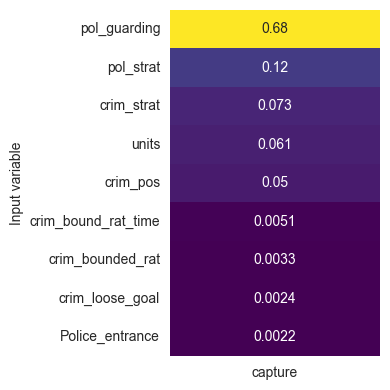

In [24]:
# feature importance all
from ema_workbench.analysis import feature_scoring

x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_bound_rat_time', 'crim_loose_goal',\
                    'pol_strat', 'pol_guarding',\
                  'Police_entrance',\
                  'units']]
y = {'capture': encoded_inout['capture'].values}

fs = feature_scoring.get_feature_scores_all(x, y)
highest_score_column = fs.columns[0]  # Assuming the scores are in the second column, adjust as needed
fs_sorted = fs.sort_values(by=highest_score_column, ascending=False)


plt.figure(figsize=(4, 4))
# Visualize the sorted feature importance scores
heatmap = sns.heatmap(fs_sorted, cmap="viridis", annot=True)
# Remove the colorbar legend on the side
heatmap.collections[0].colorbar.remove()
# Remove y-axis labels
heatmap.set_ylabel('Input variable')
# Adjust layout to prevent clipping of axis labels
plt.tight_layout()
plt.savefig('Figures/crimint_featureimp_capture.png')
plt.show()

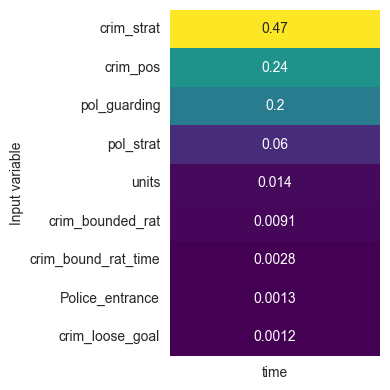

In [25]:
# feature importance all
from ema_workbench.analysis import feature_scoring

x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_bound_rat_time', 'crim_loose_goal',\
                    'pol_strat', 'pol_guarding',\
                  'Police_entrance',\
                  'units']]
y = {'time': encoded_inout['time'].values}

fs = feature_scoring.get_feature_scores_all(x, y)
highest_score_column = fs.columns[0]  # Assuming the scores are in the second column, adjust as needed
fs_sorted = fs.sort_values(by=highest_score_column, ascending=False)


plt.figure(figsize=(4, 4))

# Visualize the sorted feature importance scores
heatmap = sns.heatmap(fs_sorted, cmap="viridis", annot=True)
# Remove the colorbar legend on the side
heatmap.collections[0].colorbar.remove()
# Remove y-axis labels
heatmap.set_ylabel('Input variable')
# Adjust layout to prevent clipping of axis labels
plt.tight_layout()
plt.savefig('Figures/crimint_featureimp_time.png')
plt.show()

In [14]:
#another way of calculating the featur eimportance 

# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# # Assuming x and y are already defined
# model = RandomForestClassifier()
# x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat',\
#                    'crim_max_diverge', 'pol_strat', 'pol_guarding',\
#                   'Police_entrance',\
#                   'units', 'P_multiple_at_station']]
# y =  encoded_inout['capture'].values

# model.fit(x, y)

# feature_importances = model.feature_importances_

# # Plotting the feature importances
# # plt.bar(x.columns, feature_importances)
# # plt.xlabel('Features')
# # plt.ylabel('Importance')
# # plt.show()

# importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# # Sort the DataFrame by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# importance_df

# Group by diverge


In [11]:
test = combined_inout.groupby(['criminal_diverged_from_path'])['capture'].mean().reset_index()
test

criminal_diverged_from_path   capture
0                             0  0.225442
1                             1  0.479893
2                             2  0.162322
3                             3  0.257449
4                             4  0.173550
5                             5  0.269718
6                             6  0.156958
7                             7  0.155556
8                             8  0.387413
9                             9  0.000000
10                           10  0.142857
11                           12  0.000000

In [14]:
test = combined_inout.groupby(['criminal_diverged_from_path'])['capture'].agg(['mean', 'size']).reset_index()
test['percentage'] = (test['size'] / len(combined_inout)) * 100
test.columns = ['criminal_diverged_from_path', 'capture_mean', 'occurrences', 'percentage']

test

criminal_diverged_from_path  capture_mean  occurrences  percentage
0                             0      0.225442       577589   93.461457
1                             1      0.479893         2238    0.362138
2                             2      0.162322        14040    2.271856
3                             3      0.257449         1678    0.271522
4                             4      0.173550        20000    3.236262
5                             5      0.269718         1027    0.166182
6                             6      0.156958          618    0.100000
7                             7      0.155556           45    0.007282
8                             8      0.387413          715    0.115696
9                             9      0.000000           39    0.006311
10                           10      0.142857            7    0.001133
11                           12      0.000000            1    0.000162

In [8]:
test = combined_inout.groupby(['criminal_seen_police'])['capture'].mean().reset_index()
test



criminal_seen_police   capture
0                     0  0.209253
1                     1  0.412317
2                     2  0.297681
3                     3  0.306452
4                     4  0.214953
5                     5  0.200000
6                     7  1.000000

In [9]:
test = combined_inout.groupby(['criminal_passed_police'])['capture'].mean().reset_index()
test

criminal_passed_police   capture
0                       0  0.202457
1                       1  0.438394
2                       2  0.293374
3                       3  0.332194
4                       4  0.222581
5                       5  0.161290
6                       6  0.714286
7                       7  1.000000

In [15]:
test = combined_inout.groupby(['pol_strat'])['capture'].mean().round(2)
test

pol_strat
furthest    0.15
largest     0.27
surround    0.25
Name: capture, dtype: float64

# MORDM

In [13]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [14]:
police = encoded_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units']).mean()[['capture','time']]

# If you want to reset the index and have a DataFrame as a result
police = police.reset_index()

police.rename(columns={'capture': 'capture mean'}, inplace=True)
police.rename(columns={'time': 'time mean'}, inplace=True)

# Display the resulting DataFrame
police

pol_strat  pol_guarding  Police_entrance  units  capture mean  time mean
0           0             0                0      3      0.215171  33.092559
1           0             0                0      5      0.270070  32.825519
2           0             0                0     10      0.366867  32.819721
3           0             0                1      3      0.217555  33.266728
4           0             0                1      5      0.255094  32.889992
5           0             0                1     10      0.363010  32.726339
6           0             1                0      3      0.007783  39.533284
7           0             1                0      5      0.013362  39.301539
8           0             1                0     10      0.026859  38.643797
9           0             1                1      3      0.007258  39.356220
10          0             1                1      5      0.015772  39.297673
11          0             1                1     10      0.027331  38.826845
12          1             0                0      3      0.319965  30.228604
13          1             0                0      5      0.569814  24.130030
14          1             0                0     10      0.702219  20.493819
15          1             0                1      3      0.328918  30.252502
16          1             0                1      5      0.568915  23.873103
17          1             0                1     10      0.698206  20.355082
18          1             1                0      3      0.001516  39.831370
19          1             1                0      5      0.002330  39.568379
20          1             1                0     10      0.003630  39.496575
21          1             1                1      3      0.001750  39.711449
22          1             1                1      5      0.002510  39.704301
23          1             1                1     10      0.003452  39.654292
24          2             0                0      3      0.436398  23.390713
25          2             0                0      5      0.503773  21.294827
26          2             0                0     10      0.549104  19.754277
27          2             0                1      3      0.441757  23.466405
28          2             0                1      5      0.506999  21.465148
29          2             0                1     10      0.537917  20.237980
30          2             1                0      3      0.000466  39.582698
31          2             1                0      5      0.000874  39.924565
32          2             1                0     10      0.001926  39.919391
33          2             1                1      3      0.000058  39.592750
34          2             1                1      5      0.000466  39.760318
35          2             1                1     10      0.001629  39.675430

C:\Users\cvanh\AppData\Local\Temp/ipykernel_35244/3091963494.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


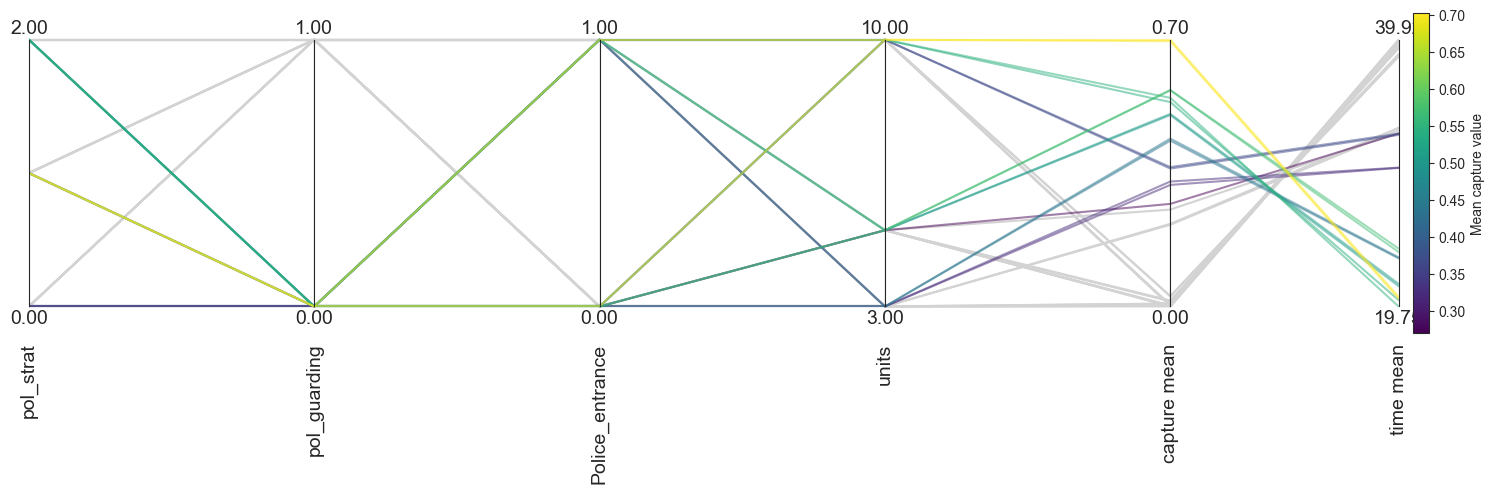

In [15]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np

# Assuming 'police' is your DataFrame
# Assuming base_inout is your DataFrame containing 'capture' column

threshold = base_inout['capture'].mean()

plt.rcParams['figure.figsize'] = (15, 5)

limits = parcoords.get_limits(police)
axes = parcoords.ParallelAxes(limits)

# Get the number of instances for each row and normalize it
num_instances = police.apply(lambda row: row['capture mean'], axis=1)

# Filter instances where 'capture' is greater than the threshold
num_instances_gt_threshold = num_instances[num_instances > threshold]

# Update normalization to consider only instances with 'capture' > threshold
norm = Normalize(vmin=num_instances_gt_threshold.min(), vmax=num_instances_gt_threshold.max())

# # Use the viridis palette from Seaborn
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = LinearSegmentedColormap.from_list('custom_cmap', ['yellow', 'navy'])


# Create a scalar mappable
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot grey lines for instances where 'capture' < threshold
for index, row in police.iterrows():
    if row['capture mean'] < threshold:
        axes.plot(row, color='lightgrey')

# Plot colored lines for instances where 'capture' > threshold
# Plot colored lines for instances where 'capture' > threshold
for index, row in police.sort_values(by='capture mean', ascending=True).iterrows():
    if row['capture mean'] >= threshold:
        color = sm.to_rgba(row['capture mean'])
        # Add alpha parameter for transparency
        axes.plot(row, color=color, alpha=0.5)  

# Add colorbar for the gradient part
cbar = plt.colorbar(sm)
cbar.set_label('Mean capture value')

# we invert this axis so direction of desirability is the same 
# axes.invert_axis('summed_deaths') 
# plt.savefig('./figs/parcoord.png', dpi=600)
plt.savefig('Figures/crimint_parallel_pol.png')
plt.show()

In [16]:
print('pol_strat', encoded_meanings['pol_strat'])
print('pol_guarding',encoded_meanings['pol_guarding'])
print('Police_entrance', encoded_meanings['Police_entrance'])



pol_strat {0: 'furthest', 1: 'largest', 2: 'surround'}
pol_guarding {0: 'metro_platform', 1: 'station_exit'}
Police_entrance {0: 'main', 1: 'side'}


In [17]:
criminal = encoded_inout.groupby(['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_bound_rat_time', 'crim_loose_goal']).mean()[['capture','time']]

# If you want to reset the index and have a DataFrame as a result
criminal = criminal.reset_index()

criminal.rename(columns={'capture': 'capture mean'}, inplace=True)
criminal.rename(columns={'time': 'time mean'}, inplace=True)

# Display the resulting DataFrame
criminal

crim_pos  crim_strat  crim_bounded_rat  crim_bound_rat_time  \
0           0           0                 0                    0   
1           0           0                 0                    0   
2           0           0                 0                    1   
3           0           0                 0                    1   
4           0           0                 0                    2   
..        ...         ...               ...                  ...   
103         2           2                 1                    0   
104         2           2                 1                    1   
105         2           2                 1                    1   
106         2           2                 1                    2   
107         2           2                 1                    2   

     crim_loose_goal  capture mean  time mean  
0                  0      0.261488  33.602452  
1                  1      0.265775  33.370713  
2                  0      0.258573  33.481653  
3                  1      0.260460  33.418296  
4                  0      0.258745  33.497942  
..               ...           ...        ...  
103                1      0.173525  21.092250  
104                0      0.178841  21.076389  
105                1      0.170782  21.112483  
106                0      0.173868  21.130144  
107                1      0.172497  21.147719  

[108 rows x 7 columns]

In [18]:
base_inout['capture'].mean()

0.2578616352201258

C:\Users\cvanh\AppData\Local\Temp/ipykernel_35244/2597555645.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


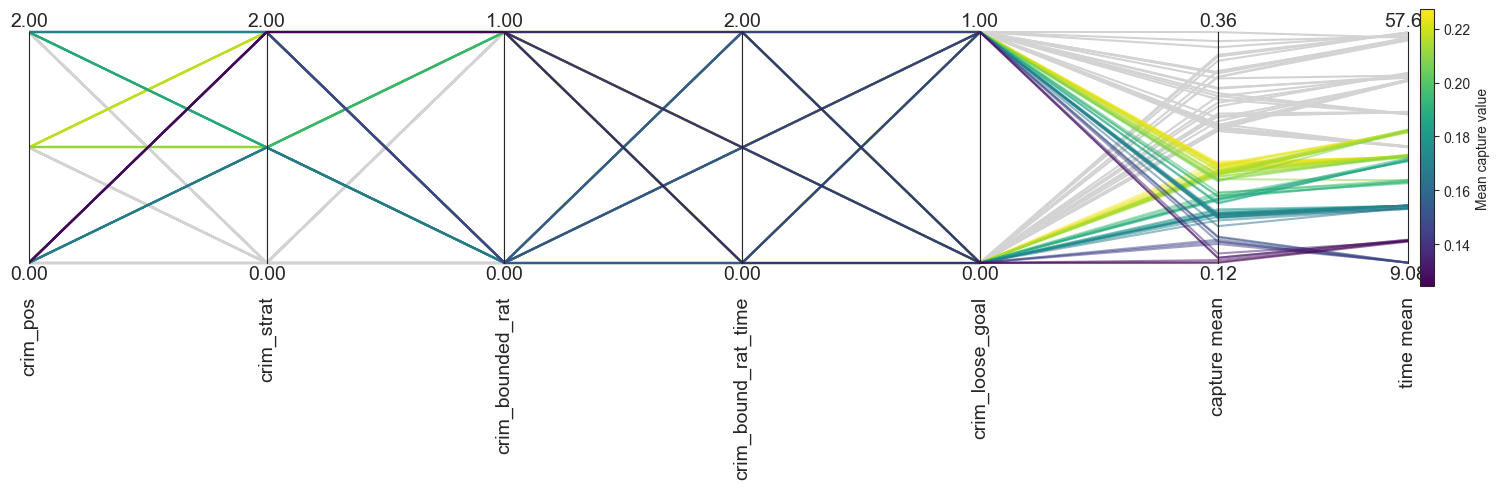

In [26]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np

# Assuming 'police' is your DataFrame
# Assuming base_inout is your DataFrame containing 'capture' column

threshold = base_inout['capture'].mean()

plt.rcParams['figure.figsize'] = (15, 5)

limits = parcoords.get_limits(criminal)
axes = parcoords.ParallelAxes(limits)

# Get the number of instances for each row and normalize it
num_instances = criminal.apply(lambda row: row['capture mean'], axis=1)

# Filter instances where 'capture' is smaller than the threshold
num_instances_gt_threshold = num_instances[num_instances < threshold]

# Update normalization to consider only instances with 'capture' > threshold
norm = Normalize(vmin=num_instances_gt_threshold.min(), vmax=num_instances_gt_threshold.max())

# # Use the viridis palette from Seaborn
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = LinearSegmentedColormap.from_list('custom_cmap', ['yellow', 'navy'])


# Create a scalar mappable
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot grey lines for instances where 'capture' < threshold
for index, row in criminal.iterrows():
    if row['capture mean'] > threshold:
        axes.plot(row, color='lightgrey')

# Plot colored lines for instances where 'capture' < threshold
for index, row in criminal.sort_values(by='capture mean', ascending=False).iterrows():
    if row['capture mean'] <= threshold:
        color = sm.to_rgba(row['capture mean'])
        # Add alpha parameter for transparency
        axes.plot(row, color=color, alpha=0.5)  

# Add colorbar for the gradient part
cbar = plt.colorbar(sm)
cbar.set_label('Mean capture value')

# we invert this axis so direction of desirability is the same 
# axes.invert_axis('summed_deaths') 
# plt.savefig('./figs/parcoord.png', dpi=600)
plt.savefig('Figures/crimint_parallel_crim.png')

plt.show()

In [20]:
print('crim_pos', encoded_meanings['crim_pos'])
print('crim_strat',encoded_meanings['crim_strat'])
print('crim_bound_rat_time', encoded_meanings['crim_bound_rat_time'])
print('crim_loose_goal', encoded_meanings['crim_loose_goal'])


crim_pos {0: 'centre', 1: 'end', 2: 'one_line'}
crim_strat {1: 'random', 2: 'to_train', 0: 'furthest'}
crim_bound_rat_time {0: 1, 1: 3, 2: 5}
crim_loose_goal {1: True, 0: False}


# capture vs. time

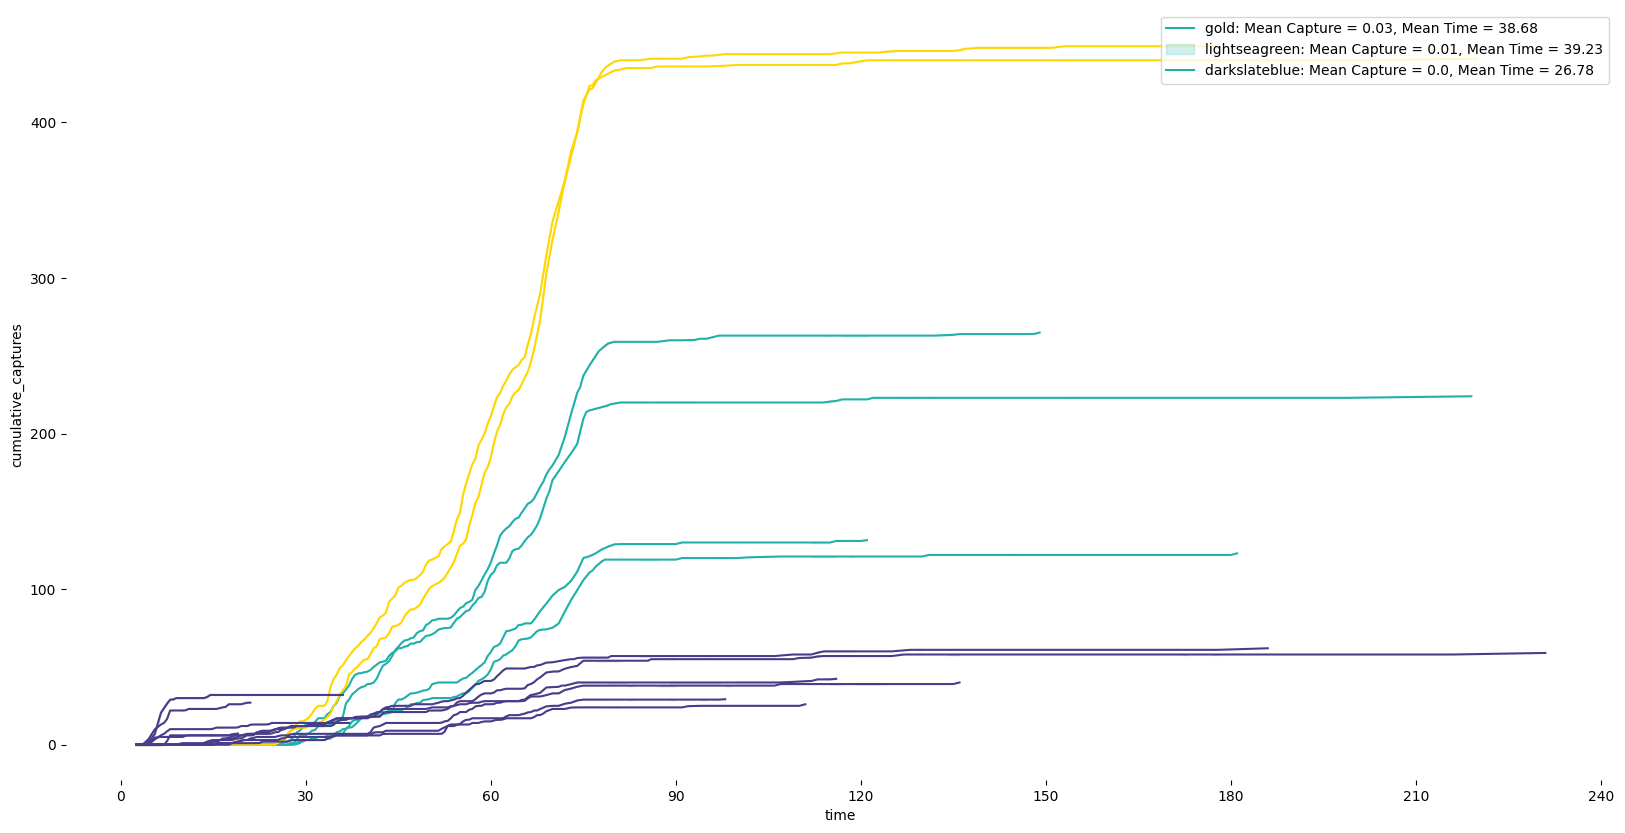

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

legend_entries = []

# Create a dictionary to store colors for different cumulative capture ranges
color_ranges = {'darkslateblue': (0, 100), 'lightseagreen': (101, 300), 'gold': (301, 500)}

# Create lists to store mean capture values and mean times for each color
mean_captures = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}
mean_times = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}

# Iterate over the groups
for (value_pol_strat, value_pol_guarding, value_Police_entrance, value_units), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 90% of the max value
    threshold_index = np.where(group_df['cumulative_captures'] >= 0.99999 * group_df['cumulative_captures'].max())[0]
    if len(threshold_index) > 0:
        threshold_index = threshold_index[0]
        group_df = group_df.iloc[:threshold_index + 1]  # Keep data up to the threshold index

    # Assign color based on cumulative capture values
    for color, (lower_bound, upper_bound) in color_ranges.items():
        if lower_bound <= group_df['cumulative_captures'].max() <= upper_bound:
            sns.lineplot(
                x='time',
                y='cumulative_captures',
                data=group_df,
                label=f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}',
                color=color
            )
            # Append mean capture and mean time values to the respective lists
            mean_captures[color].append(group_df['capture'].mean())
            mean_times[color].append(group_df['time'].mean())
            break

# Create a custom legend with mean capture and mean time values
custom_legend_labels = []
for color in ['gold', 'lightseagreen', 'darkslateblue']:
    mean_capture_value = round(np.mean(mean_captures[color]), 2)
    mean_time_value = round(np.mean(mean_times[color]), 2)
    custom_legend_labels.append(f'{color}: Mean Capture = {mean_capture_value}, Mean Time = {mean_time_value}')

# Set legend
ax.legend(custom_legend_labels, loc='upper right')

plt.xticks(range(0, 270, 30))

ax.set(frame_on=False)

plt.savefig('Figures/crimint_timevscap_pol.png')

plt.show()

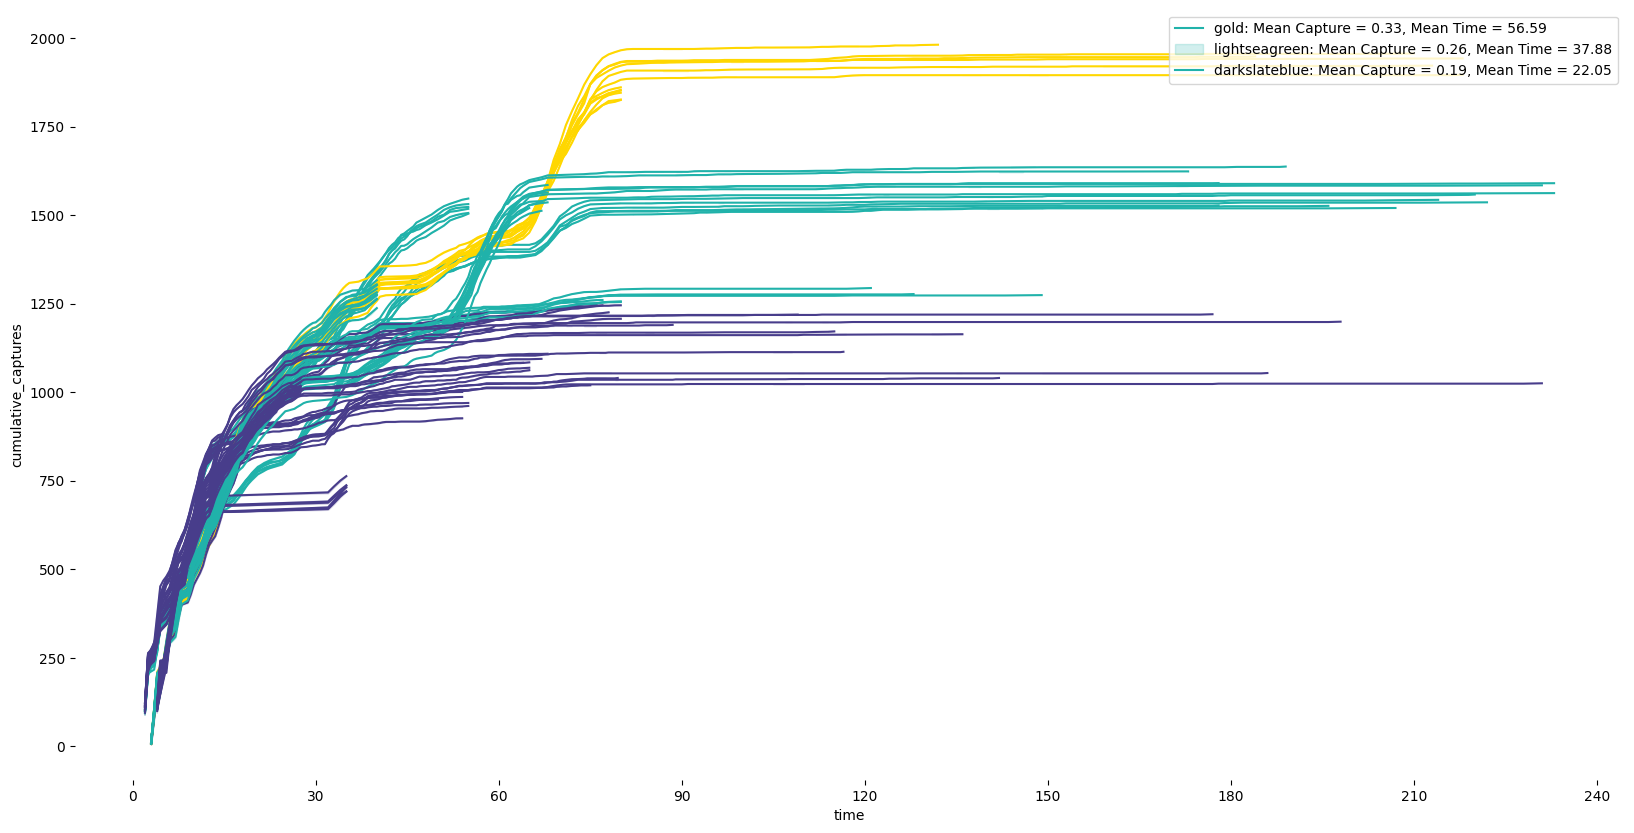

In [10]:
# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_bound_rat_time', 'crim_loose_goal'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

legend_entries = []

# Create a dictionary to store colors for different cumulative capture ranges
color_ranges = {'darkslateblue': (0, 1250), 'lightseagreen': (1251, 1750), 'gold': (1751, 2100)}

# Create lists to store mean capture values and mean times for each color
mean_captures = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}
mean_times = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}

# Iterate over the groups
for (value_crim_pos, value_crim_strat, value_crim_bound_rat, value_crim_bound_rat_time, value_crim_loose_goal), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 90% of the max value
    threshold_index = np.where(group_df['cumulative_captures'] >= 0.99999 * group_df['cumulative_captures'].max())[0]
    if len(threshold_index) > 0:
        threshold_index = threshold_index[0]
        group_df = group_df.iloc[:threshold_index + 1]  # Keep data up to the threshold index

    # Assign color based on cumulative capture values
    for color, (lower_bound, upper_bound) in color_ranges.items():
        if lower_bound <= group_df['cumulative_captures'].max() <= upper_bound:
            sns.lineplot(
                x='time',
                y='cumulative_captures',
                data=group_df,
                label=f'Group-{value_crim_pos}{value_crim_strat}{value_crim_bound_rat}{value_crim_bound_rat_time}{value_crim_loose_goal}',
                color=color
            )
            # Append mean capture and mean time values to the respective lists
            mean_captures[color].append(group_df['capture'].mean())
            mean_times[color].append(group_df['time'].mean())
            break

# Create a custom legend with mean capture and mean time values
custom_legend_labels = []
for color in ['gold', 'lightseagreen', 'darkslateblue']:
    mean_capture_value = round(np.mean(mean_captures[color]), 2)
    mean_time_value = round(np.mean(mean_times[color]), 2)
    custom_legend_labels.append(f'{color}: Mean Capture = {mean_capture_value}, Mean Time = {mean_time_value}')

# Set legend
ax.legend(custom_legend_labels, loc='upper right')

plt.xticks(range(0, 270, 30))

ax.set(frame_on=False)

plt.savefig('Figures/crimint_timevscap_crim.png')

plt.show()

# SENSITIVITY ANALYSIS

In [6]:
columns_of_interest = ['crim_pos', 'crim_strat', 'crim_bounded_rat', 'crim_bound_rat_time', 'crim_loose_goal',
                        'pol_strat', 'pol_guarding',
                        'Police_entrance', 'units', ]

# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std']).reset_index()

# Display the result
result_df

crim_pos crim_strat crim_bounded_rat crim_bound_rat_time  \
                                                                 
0       centre   furthest            False                   1   
1       centre   furthest            False                   1   
2       centre   furthest            False                   1   
3       centre   furthest            False                   1   
4       centre   furthest            False                   1   
...        ...        ...              ...                 ...   
3883  one_line   to_train             True                   5   
3884  one_line   to_train             True                   5   
3885  one_line   to_train             True                   5   
3886  one_line   to_train             True                   5   
3887  one_line   to_train             True                   5   

     crim_loose_goal pol_strat    pol_guarding Police_entrance units  \
                                                                       
0              False  furthest  metro_platform            main     3   
1              False  furthest  metro_platform            main     5   
2              False  furthest  metro_platform            main    10   
3              False  furthest  metro_platform            side     3   
4              False  furthest  metro_platform            side     5   
...              ...       ...             ...             ...   ...   
3883            True  surround    station_exit            main     5   
3884            True  surround    station_exit            main    10   
3885            True  surround    station_exit            side     3   
3886            True  surround    station_exit            side     5   
3887            True  surround    station_exit            side    10   

       capture                 time             
          mean       std       mean        std  
0     0.283951  0.452311  35.478395  13.625805  
1     0.407407  0.492875  35.101852  14.494499  
2     0.691358  0.463365  33.138889  14.380613  
3     0.302469  0.460752  35.493827  14.241156  
4     0.425926  0.496016  33.558642  13.687550  
...        ...       ...        ...        ...  
3883  0.000000  0.000000  24.425926   3.405431  
3884  0.000000  0.000000  24.086420   3.357841  
3885  0.000000  0.000000  24.092593   3.309230  
3886  0.000000  0.000000  23.956790   3.138815  
3887  0.000000  0.000000  24.518519   3.455974  

[3888 rows x 13 columns]

In [7]:
columns_of_interest =['crim_pos', 'crim_strat', 'crim_bounded_rat', 'crim_bound_rat_time', 'crim_loose_goal',
                        'pol_strat', 'pol_guarding',
                        'Police_entrance', 'units', ]


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_pos crim_strat crim_bounded_rat crim_bound_rat_time  \
                                                                 
720     centre     random             True                   3   
713     centre     random             True                   1   
2834  one_line   furthest             True                   1   
2868  one_line   furthest             True                   1   
1707       end   furthest             True                   5   
...        ...        ...              ...                 ...   
2339       end   to_train            False                   5   
3658  one_line   to_train            False                   5   
3729  one_line   to_train             True                   1   
2327       end   to_train            False                   5   
3523  one_line   to_train            False                   1   

     crim_loose_goal pol_strat    pol_guarding Police_entrance units  \
                                                                       
720            False  furthest  metro_platform            main     3   
713             True  surround  metro_platform            side    10   
2834           False  surround  metro_platform            main    10   
2868            True  surround  metro_platform            main     3   
1707            True   largest  metro_platform            side     3   
...              ...       ...             ...             ...   ...   
2339           False  surround    station_exit            side    10   
3658            True   largest    station_exit            side     5   
3729            True   largest    station_exit            side     3   
2327           False   largest    station_exit            side    10   
3523            True  surround    station_exit            main     5   

       capture                           time                          
          mean       std       var       mean        std          var  
720   0.189542  0.393226  0.154627  30.176471  36.090141  1302.498259  
713   0.380645  0.487119  0.237285  26.270968  34.804894  1211.380645  
2834  0.382166  0.487472  0.237629  38.812102  33.783929  1141.353891  
2868  0.356250  0.480394  0.230778  42.365625  32.763961  1073.477113  
1707  0.397516  0.490911  0.240994  54.984472  31.199030   973.379445  
...        ...       ...       ...        ...        ...          ...  
2339  0.000000  0.000000  0.000000  37.592593   2.961042     8.767771  
3658  0.000000  0.000000  0.000000  23.716049   2.946140     8.679741  
3729  0.000000  0.000000  0.000000  23.574074   2.930999     8.590752  
2327  0.000000  0.000000  0.000000  37.425926   2.921978     8.537957  
3523  0.000000  0.000000  0.000000  23.839506   2.728191     7.443026  

[3888 rows x 15 columns]

In [8]:
columns_of_interest = ['crim_pos', 'crim_strat', 'crim_bounded_rat']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_pos crim_strat crim_bounded_rat   capture                      \
                                              mean       std       var   
7        end   furthest             True  0.341796  0.474318  0.224978   
6        end   furthest            False  0.316529  0.465129  0.216345   
13  one_line   furthest             True  0.296457  0.456702  0.208577   
1     centre   furthest             True  0.283821  0.450858  0.203273   
3     centre     random             True  0.195970  0.396952  0.157571   
9        end     random             True  0.219454  0.413882  0.171299   
15  one_line     random             True  0.212292  0.408936  0.167229   
8        end     random            False  0.214135  0.410227  0.168286   
12  one_line   furthest            False  0.264940  0.441308  0.194753   
14  one_line     random            False  0.188163  0.390848  0.152762   
0     centre   furthest            False  0.261288  0.439343  0.193022   
5     centre   to_train             True  0.128347  0.334481  0.111877   
10       end   to_train            False  0.221851  0.415497  0.172638   
11       end   to_train             True  0.221565  0.415306  0.172479   
2     centre     random            False  0.169473  0.375175  0.140756   
17  one_line   to_train             True  0.173868  0.379002  0.143642   
16  one_line   to_train            False  0.174297  0.379370  0.143922   
4     centre   to_train            False  0.147548  0.354656  0.125781   

         time                         
         mean        std         var  
7   57.159041  27.593090  761.378615  
6   56.248371  24.731415  611.642891  
13  48.540829  23.552664  554.727972  
1   40.610108  22.559192  508.917134  
3   26.223748  21.079443  444.342900  
9   36.789471  20.824790  433.671876  
15  31.580884  20.380950  415.383123  
8   36.841278  20.351816  414.196406  
12  47.497142  19.704421  388.264211  
14  30.719028  16.727066  279.794736  
0   33.489526  13.733891  188.619771  
5   13.745055  12.518206  156.705492  
10  31.481110  11.287815  127.414764  
11  31.520105  11.253917  126.650656  
2   20.568813  11.127272  123.816174  
17  21.114340   7.001205   49.016876  
16  21.108768   6.947199   48.263569  
4    9.098151   5.245930   27.519781

In [9]:
columns_of_interest = ['pol_strat', 'pol_guarding',
                        'Police_entrance', 'units']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

pol_strat    pol_guarding Police_entrance units   capture            \
                                                        mean       std   
3   furthest  metro_platform            side     3  0.217555  0.412595   
0   furthest  metro_platform            main     3  0.215171  0.410953   
5   furthest  metro_platform            side    10  0.363010  0.480882   
1   furthest  metro_platform            main     5  0.270070  0.444009   
4   furthest  metro_platform            side     5  0.255094  0.435927   
2   furthest  metro_platform            main    10  0.366867  0.481964   
31  surround    station_exit            main     5  0.000874  0.029548   
18   largest    station_exit            main     3  0.001516  0.038911   
15   largest  metro_platform            side     3  0.328918  0.469834   
12   largest  metro_platform            main     3  0.319965  0.466476   
23   largest    station_exit            side    10  0.003452  0.058655   
22   largest    station_exit            side     5  0.002510  0.050035   
34  surround    station_exit            side     5  0.000466  0.021575   
33  surround    station_exit            side     3  0.000058  0.007634   
6   furthest    station_exit            main     3  0.007783  0.087880   
32  surround    station_exit            main    10  0.001926  0.043848   
21   largest    station_exit            side     3  0.001750  0.041794   
9   furthest    station_exit            side     3  0.007258  0.084889   
10  furthest    station_exit            side     5  0.015772  0.124596   
7   furthest    station_exit            main     5  0.013362  0.114823   
35  surround    station_exit            side    10  0.001629  0.040325   
19   largest    station_exit            main     5  0.002330  0.048213   
11  furthest    station_exit            side    10  0.027331  0.163050   
20   largest    station_exit            main    10  0.003630  0.060143   
27  surround  metro_platform            side     3  0.441757  0.496611   
30  surround    station_exit            main     3  0.000466  0.021577   
8   furthest    station_exit            main    10  0.026859  0.161677   
24  surround  metro_platform            main     3  0.436398  0.495953   
28  surround  metro_platform            side     5  0.506999  0.499965   
25  surround  metro_platform            main     5  0.503773  0.500000   
29  surround  metro_platform            side    10  0.537917  0.498575   
26  surround  metro_platform            main    10  0.549104  0.497597   
13   largest  metro_platform            main     5  0.569814  0.495116   
16   largest  metro_platform            side     5  0.568915  0.495242   
14   largest  metro_platform            main    10  0.702219  0.457296   
17   largest  metro_platform            side    10  0.698206  0.459049   

                   time                         
         var       mean        std         var  
3   0.170234  33.266728  23.668804  560.212296  
0   0.168882  33.092559  23.311573  543.429428  
5   0.231247  32.726339  23.256018  540.842394  
1   0.197144  32.825519  23.045907  531.113816  
4   0.190032  32.889992  23.021495  529.989243  
2   0.232289  32.819721  22.967864  527.522794  
31  0.000873  39.924565  21.337490  455.288495  
18  0.001514  39.831370  21.337116  455.272522  
15  0.220744  30.252502  21.322363  454.643170  
12  0.217600  30.228604  21.228080  450.631394  
23  0.003440  39.654292  21.072173  444.036462  
22  0.002503  39.704301  21.057726  443.427835  
34  0.000465  39.760318  21.029896  442.256512  
33  0.000058  39.592750  20.990363  440.595328  
6   0.007723  39.533284  20.940597  438.508607  
32  0.001923  39.919391  20.913278  437.365196  
21  0.001747  39.711449  20.887521  436.288518  
9   0.007206  39.356220  20.852865  434.841985  
10  0.015524  39.297673  20.835841  434.132280  
7   0.013184  39.301539  20.820785  433.505084  
35  0.001626  39.675430  20.806346  432.904043  
19  0.002324  39.568379  20.790848  432.259362  
11  0.026585  

In [14]:
# Group by 'pol_strat'
listy=['pol_strat', 'pol_guarding','Police_entrance', 'units']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture','time']]

    # Calculate mean, std, and var for 'capture' within each group
    result_df = grouped_df.agg(['mean', 'std']).reset_index()

    # Rename the columns for clarity
    result_df.columns = [item, 'mean_capture', 'std_capture', 'mean_time','std_time']
    result_df = result_df.round(2)
    display(result_df)

pol_strat  mean_capture  std_capture  mean_time  std_time
0  furthest          0.15         0.36      36.00     22.26
1   largest          0.27         0.44      32.22     21.04
2  surround          0.25         0.43      30.62     22.36

pol_guarding  mean_capture  std_capture  mean_time  std_time
0  metro_platform          0.44         0.50      26.46     21.12
1    station_exit          0.01         0.08      39.53     20.90

Police_entrance  mean_capture  std_capture  mean_time  std_time
0            main          0.22         0.42      32.92     21.95
1            side          0.22         0.42      32.94     22.06

units  mean_capture  std_capture  mean_time  std_time
0      3          0.17         0.37      34.24     22.22
1      5          0.23         0.42      32.78     21.97
2     10          0.28         0.45      31.78     21.76

In [13]:
for item in listy:
    if item != 'units':
        print(encoded_meanings[item])
        print(item,'capture',np.cov(encoded_inout[item],encoded_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(encoded_inout[item],encoded_inout['time'])[0,1].round(2),'\n')
    else:
        print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

{0: 'furthest', 1: 'largest', 2: 'surround'}
pol_strat capture 0.03
pol_strat time -1.79 

{0: 'metro_platform', 1: 'station_exit'}
pol_guarding capture -0.11
pol_guarding time 3.27 

{0: 'main', 1: 'side'}
Police_entrance capture -0.0
Police_entrance time 0.0 

units capture 0.13
units time -2.79 



In [17]:
# Group by 'pol_strat'
listy=['crim_pos', 'crim_strat','crim_bounded_rat', 'crim_bound_rat_time','crim_loose_goal']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture','time']]

    # Calculate mean, std, and var for 'capture' within each group
    result_df = grouped_df.agg(['mean', 'std']).reset_index()

    # Rename the columns for clarity
    result_df.columns = [item, 'mean_capture', 'std_capture', 'mean_time','std_time']
    result_df = result_df.round(2)
    display(result_df)

crim_pos  mean_capture  std_capture  mean_time  std_time
0    centre          0.20         0.40      23.73     18.82
1       end          0.26         0.44      41.62     22.98
2  one_line          0.22         0.41      33.25     20.20

crim_strat  mean_capture  std_capture  mean_time  std_time
0   furthest          0.29         0.46      47.28     23.88
1     random          0.20         0.40      30.52     19.60
2   to_train          0.18         0.38      21.35     12.58

crim_bounded_rat  mean_capture  std_capture  mean_time  std_time
0             False          0.22         0.41      31.92     20.67
1              True          0.23         0.42      33.98     23.26

crim_bound_rat_time  mean_capture  std_capture  mean_time  std_time
0                    1          0.22         0.42      32.95     22.03
1                    3          0.22         0.42      32.92     21.99
2                    5          0.22         0.42      32.93     21.99

crim_loose_goal  mean_capture  std_capture  mean_time  std_time
0            False          0.22         0.42      33.04     22.05
1             True          0.23         0.42      32.83     21.96

In [16]:
for item in listy:
    if item != 'units':
        print(encoded_meanings[item])
        print(item,'capture',np.cov(encoded_inout[item],encoded_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(encoded_inout[item],encoded_inout['time'])[0,1].round(2),'\n')
    else:
        print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

{0: 'centre', 1: 'end', 2: 'one_line'}
crim_pos capture 0.01
crim_pos time 3.14 

{1: 'random', 2: 'to_train', 0: 'furthest'}
crim_strat capture -0.04
crim_strat time -8.67 

{1: True, 0: False}
crim_bounded_rat capture 0.0
crim_bounded_rat time 0.52 

{0: 1, 1: 3, 2: 5}
crim_bound_rat_time capture 0.0
crim_bound_rat_time time -0.01 

{1: True, 0: False}
crim_loose_goal capture 0.0
crim_loose_goal time -0.05 



# Time vs. capture

In [ ]:

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units', 'init_call_delay'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

legend_entries = []

# Create a dictionary to store colors for each init_call_delay value
colors_dict = {1: 'gold', 3: 'lightseagreen', 6: 'darkslateblue'}

# Iterate over the groups
for (value_pol_strat, value_pol_guarding, value_Police_entrance, value_units, value_delay), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    legend_entries.append((
        f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}{value_delay}',
        group_df['cumulative_captures'].max()
    ))

    color = colors_dict.get(value_delay, 'gray')  # Default to gray if the value_delay is not in the dictionary

    sns.lineplot(
        x='time',
        y='cumulative_captures',
        data=group_df,
        label=f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}{value_delay}',
        color=color  # Assign color based on init_call_delay
    )

legend_entries.sort(key=lambda x: x[1], reverse=True)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=colors_dict[val], lw=2, label=f'Init Call Delay: {val}') for val in colors_dict.keys()]
ax.legend(handles=custom_legend, loc='upper right')

plt.xticks(range(0, 120, 30))
plt.ylim(0, 600)
plt.xlim(0, 120)

ax.set(frame_on=False)

plt.savefig('Figures/crimint_timevscap_pol.png')

plt.show()

# PAY OFF MATRIX

In [31]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_bound_rat_time', 'crim_loose_goal', 'crim_max_diverge',
       'pol_strat', 'pol_guarding', 'Police_entrance', 'units',
       'P_multiple_at_station', 'police_start_pos103', 'police_start_pos104',
       'police_goal103', 'police_goal104', 'police_changed_goal103',
       'police_changed_goal10

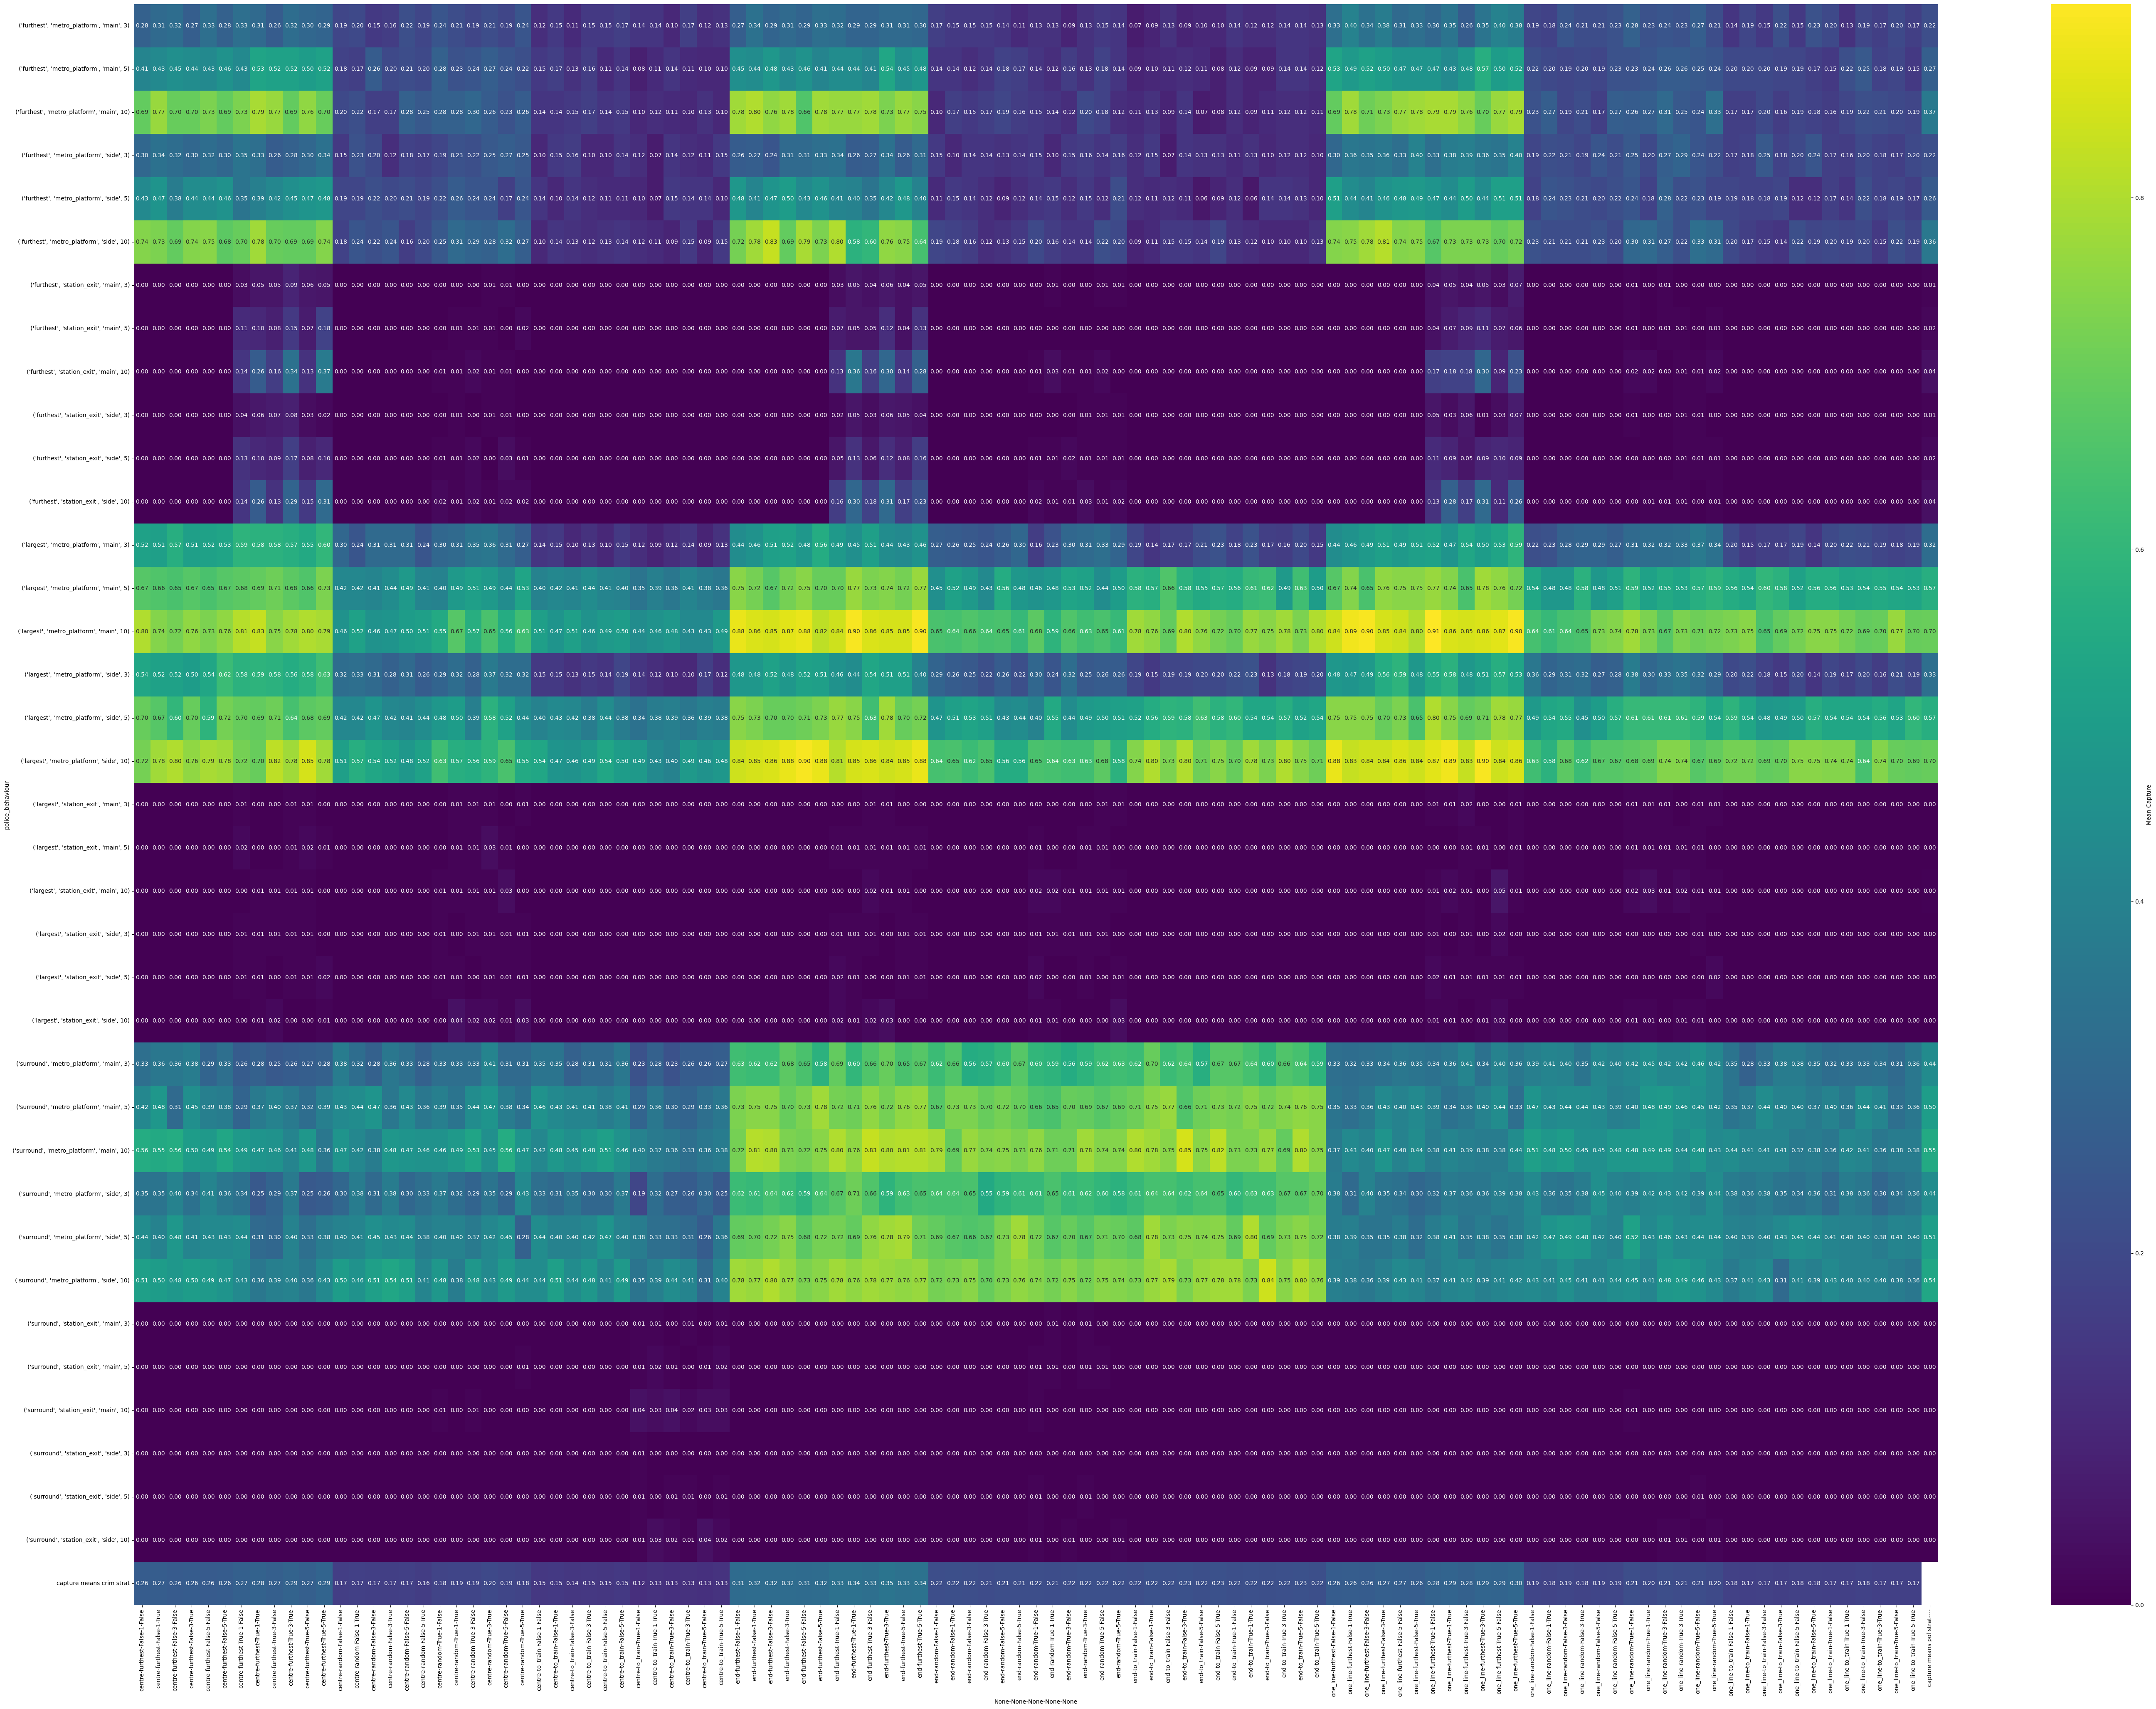

In [10]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat','crim_bound_rat_time','crim_loose_goal']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['capture'].mean().reset_index()

# Pivot the table to get the desired format
mean_capture_pivot = result_table.pivot(index='police_behaviour', columns='criminal_behaviour', values='capture')

# Sort rows and columns
mean_capture_pivot.sort_index(axis=0, inplace=True)
mean_capture_pivot.sort_index(axis=1, inplace=True)

mean_capture_pivot = mean_capture_pivot.round(2)
# result_table_pivot

# Calculate row and column means
row_means = mean_capture_pivot.mean(axis=1)
col_means = mean_capture_pivot.mean(axis=0)

# Create a new column and row for row and column means
mean_capture_pivot['capture means pol strat'] = row_means
mean_capture_pivot.loc['capture means crim strat'] = col_means

# Use seaborn to create a heatmap with a color scale
plt.figure(figsize=(70, 50))
sns.heatmap(mean_capture_pivot, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Capture'})
plt.savefig('Figures/crimint_mean_cap_pivot.png')
plt.show()

In [15]:
minimum1 = []

for index, row in mean_capture_pivot.iterrows():
    minimum1.append(row.min())

conservative1 = max(minimum1)

# Find the index corresponding to the maximum value
index_of_conservative1 = minimum1.index(conservative1)

print("Conservative Value:", conservative1)
print("Index of Conservative Value:", index_of_conservative1)

Conservative Value: 0.426
Index of Conservative Value: 14


In [34]:
mean_capture_pivot.iloc[14]

centre    furthest  False  1  False    0.796
                              True     0.741
                           3  False    0.722
                              True     0.759
                           5  False    0.735
                                       ...  
one_line  to_train  True   1  True     0.722
                           3  False    0.685
                              True     0.704
                           5  False    0.765
                              True     0.698
Name: (largest, metro_platform, main, 10), Length: 108, dtype: float64

In [35]:
# maximum2 = []

# for column, series in mean_capture_pivot.iteritems():
#     maximum2.append(series.max())

# conservative2 = min(maximum2)

# # Find the column number corresponding to the minimum value
# column_of_conservative2 = maximum2.index(conservative2)

# print("Conservative2:", conservative2)
# print("Column Number of Conservative2:", column_of_conservative2)

maximum2 = []

for column, series in mean_capture_pivot.iteritems():
    maximum2.append(series.min())

conservative2 = max(maximum2)

# Find the column number corresponding to the minimum value
column_of_conservative2 = maximum2.index(conservative2)

print("Conservative2:", conservative2)
print("Column Number of Conservative2:", column_of_conservative2)


Conservative2: 0.0
Column Number of Conservative2: 0


In [36]:
mean_capture_pivot.columns[0]

('centre', 'furthest', False, 1, False)

In [39]:
# mean_capture_pivot

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


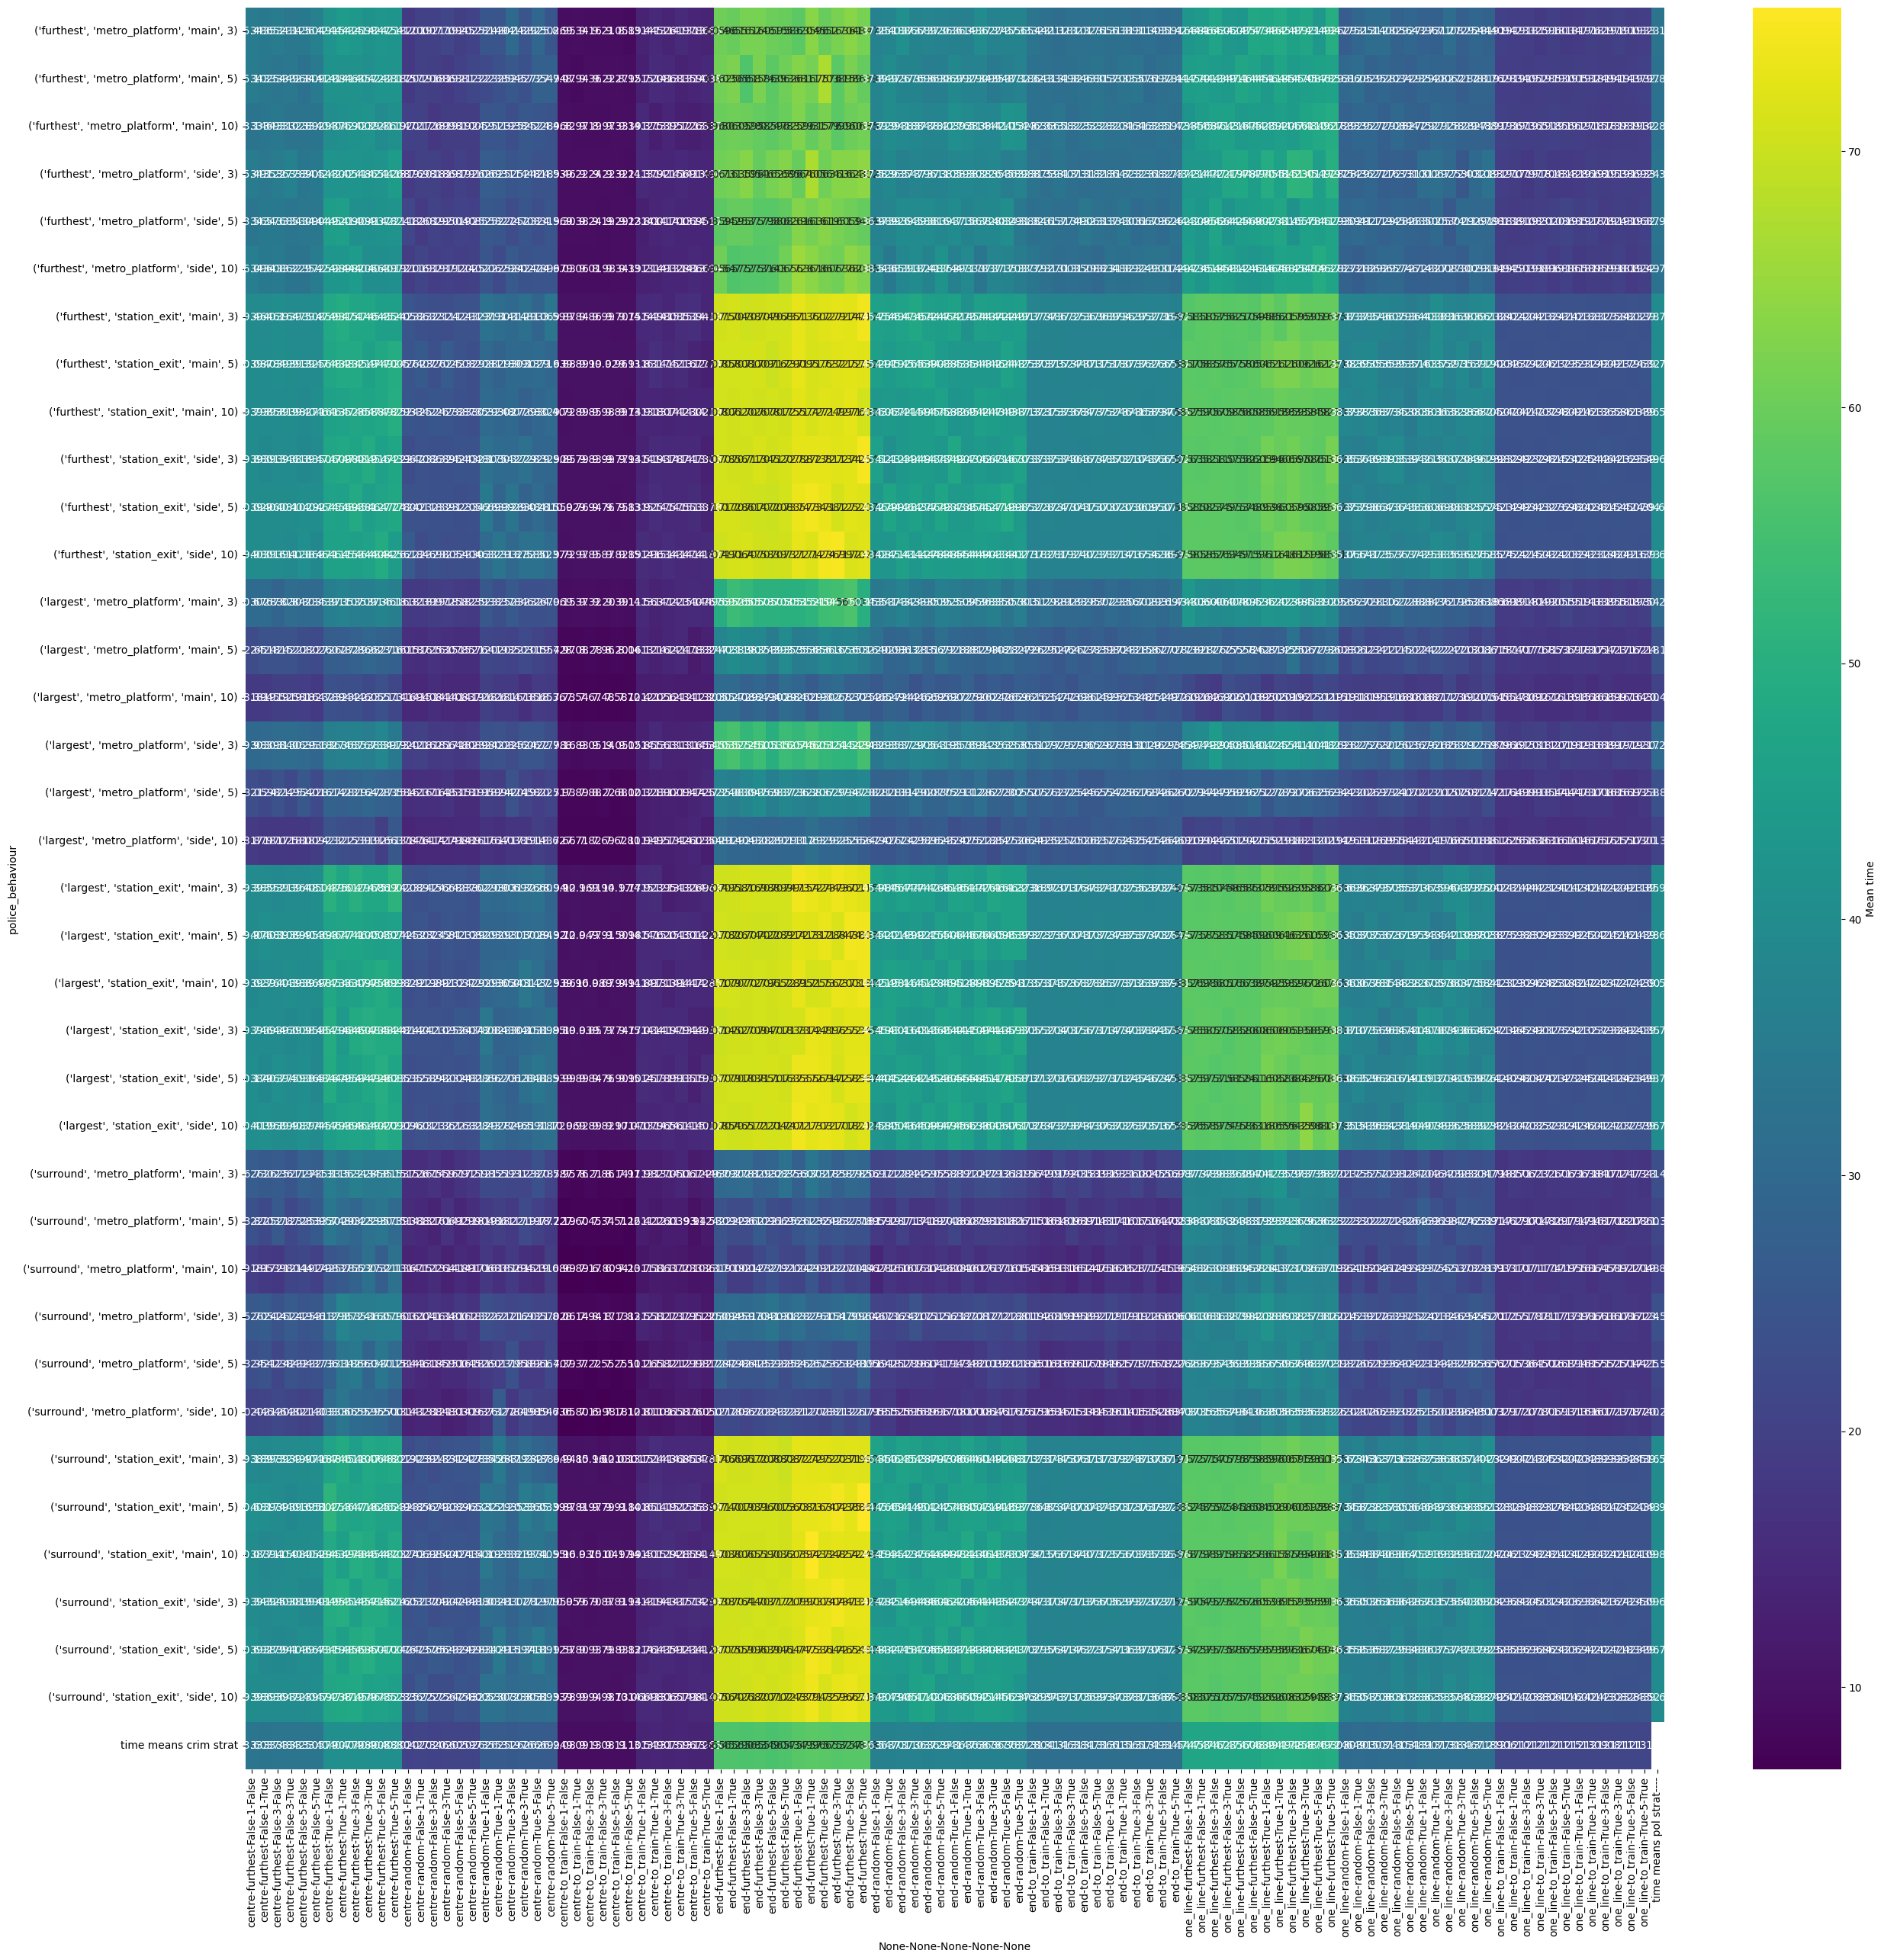

In [9]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat','crim_bound_rat_time','crim_loose_goal']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['time'].mean().reset_index()

# Pivot the table to get the desired format
mean_capture_pivot = result_table.pivot(index='police_behaviour', columns='criminal_behaviour', values='time')

# Sort rows and columns
mean_capture_pivot.sort_index(axis=0, inplace=True)
mean_capture_pivot.sort_index(axis=1, inplace=True)

mean_capture_pivot = mean_capture_pivot.round(3)
# result_table_pivot

# Calculate row and column means
row_means = mean_capture_pivot.mean(axis=1)
col_means = mean_capture_pivot.mean(axis=0)

# Create a new column and row for row and column means
mean_capture_pivot['time means pol strat'] = row_means
mean_capture_pivot.loc['time means crim strat'] = col_means

# Use seaborn to create a heatmap with a color scale
plt.figure(figsize=(30, 30))
sns.heatmap(mean_capture_pivot, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Mean time'})
plt.savefig('Figures/crimint_mean_time_pivot.png')
# plt.show()

In [11]:
minimum1 = []

for index, row in mean_capture_pivot.iterrows():
    minimum1.append(row.min())

conservative1 = max(minimum1)

# Find the index corresponding to the maximum value
index_of_conservative1 = minimum1.index(conservative1)

print("Conservative Value:", conservative1)
print("Index of Conservative Value:", index_of_conservative1)

Conservative Value: 9.883
Index of Conservative Value: 7


In [45]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units', 'P_multiple_at_station']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat', 'crim_max_diverge']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['capture'].mean().reset_index()

# Sort the result_table by the mean capture values in descending order
mean_capture_df = result_table.sort_values(by='capture', ascending=False)

In [46]:
mean_capture_df[mean_capture_df['capture'] > 0.75]

police_behaviour               criminal_behaviour  \
265   (largest, metro_platform, main, 10, 5)   (one_line, furthest, True, 10)   
312   (largest, metro_platform, side, 10, 5)       (end, furthest, False, 10)   
319   (largest, metro_platform, side, 10, 5)   (one_line, furthest, True, 10)   
259   (largest, metro_platform, main, 10, 5)        (end, furthest, True, 10)   
258   (largest, metro_platform, main, 10, 5)       (end, furthest, False, 10)   
264   (largest, metro_platform, main, 10, 5)  (one_line, furthest, False, 10)   
313   (largest, metro_platform, side, 10, 5)        (end, furthest, True, 10)   
318   (largest, metro_platform, side, 10, 5)  (one_line, furthest, False, 10)   
475  (surround, metro_platform, main, 10, 5)        (end, furthest, True, 10)   
253   (largest, metro_platform, main, 10, 5)     (centre, furthest, True, 10)   
478  (surround, metro_platform, main, 10, 5)       (end, to_train, False, 10)   
533  (surround, metro_platform, side, 10, 5)        (end, to_train, True, 10)   
307   (largest, metro_platform, side, 10, 5)     (centre, furthest, True, 10)   
306   (largest, metro_platform, side, 10, 5)    (centre, furthest, False, 10)   
529  (surround, metro_platform, side, 10, 5)        (end, furthest, True, 10)   
528  (surround, metro_platform, side, 10, 5)       (end, furthest, False, 10)   
49   (furthest, metro_platform, main, 10, 5)   (one_line, furthest, True, 10)   
532  (surround, metro_platform, side, 10, 5)       (end, to_train, False, 10)   
43   (furthest, metro_platform, main, 10, 5)        (end, furthest, True, 10)   
102  (furthest, metro_platform, side, 10, 5)  (one_line, furthest, False, 10)   
42   (furthest, metro_platform, main, 10, 5)       (end, furthest, False, 10)   
96   (furthest, metro_platform, side, 10, 5)       (end, furthest, False, 10)   
263   (largest, metro_platform, main, 10, 5)        (end, to_train, True, 10)   
316   (largest, metro_platform, side, 10, 5)       (end, to_train, False, 10)   
474  (surround, metro_platform, main, 10, 5)       (end, furthest, False, 10)   
252   (largest, metro_platform, main, 10, 5)    (centre, furthest, False, 10)   

      capture  
265  0.874477  
312  0.866255  
319  0.865904  
259  0.865226  
258  0.861111  
264  0.851699  
313  0.848765  
318  0.847737  
475  0.802266  
253  0.792413  
478  0.791152  
533  0.775720  
307  0.775316  
306  0.771605  
529  0.768280  
528  0.767490  
49   0.766885  
532  0.763374  
43   0.762101  
102  0.761317  
42   0.760288  
96   0.759259  
263  0.758230  
316  0.755144  
474  0.754115  
252  0.752058

In [47]:
filtered_df = mean_capture_df[mean_capture_df['capture'] >  base_inout['capture'].mean()]
criminal_beh_frequency = filtered_df['police_behaviour'].value_counts().reset_index()

# Rename the columns for clarity
criminal_beh_frequency.columns = ['police_behaviour', 'frequency']

# unique_values_frequency = unique_values_frequency.rename(columns={'police_behaviour': 'police_behviour  \n  testttt<br>ttestttt'})
criminal_beh_frequency = criminal_beh_frequency.rename(columns={'police_behaviour': 'police_behaviour<br>(strat, guarding, entrance, units, units_at_station)'})

from IPython.display import display, HTML
# Convert entire DataFrame to HTML, and have it rendered
display(HTML(criminal_beh_frequency.to_html(escape=False)))

In [48]:
filtered_df = mean_capture_df[mean_capture_df['capture'] > base_inout['capture'].mean()]
police_beh_frequency = filtered_df['criminal_behaviour'].value_counts().reset_index()

# Rename the columns for clarity
police_beh_frequency.columns = ['criminal_behaviour', 'frequency']

# unique_values_frequency = unique_values_frequency.rename(columns={'police_behaviour': 'police_behviour  \n  testttt<br>ttestttt'})
police_beh_frequency = police_beh_frequency.rename(columns={'criminal_behaviour': 'criminal_behaviour<br>(init_pos, strat, panic, max_diverge)'})

from IPython.display import display, HTML
# Convert entire DataFrame to HTML, and have it rendered
display(HTML(police_beh_frequency.to_html(escape=False)))

# Worst/best performing strategy

In [52]:
group_mean_capture = combined_inout.groupby(['scenario',  'crim_pos',
       'crim_strat', 'crim_bounded_rat','crim_bound_rat_time','crim_loose_goal', 'pol_strat',
       'pol_guarding', 'Police_entrance', 'units'])['capture'].mean().reset_index(name='mean_capture')

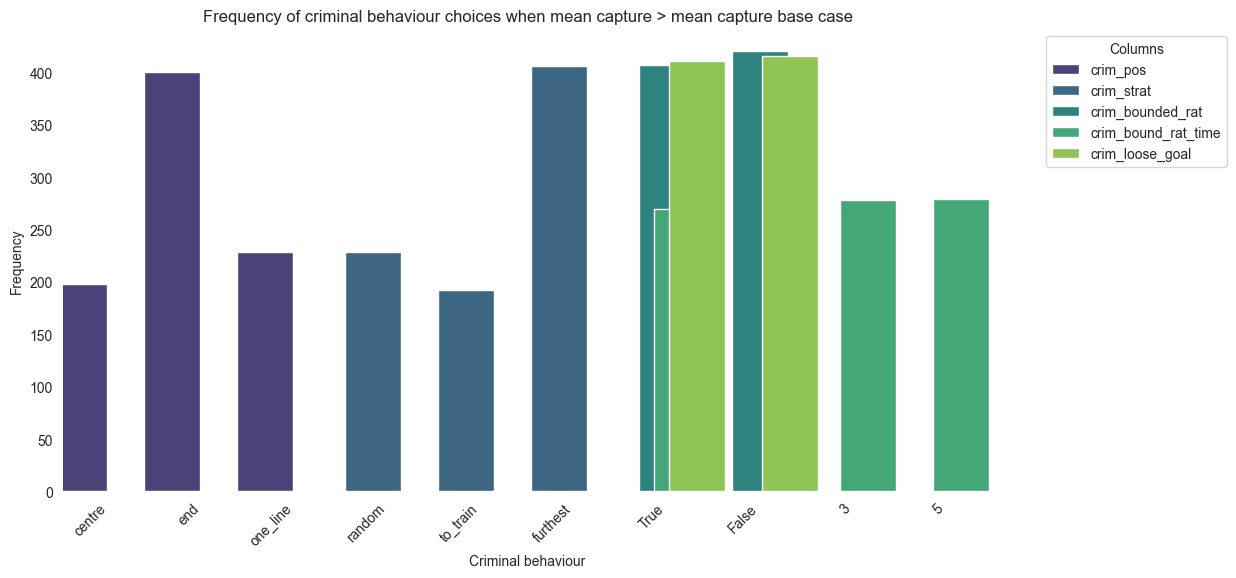

In [53]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] > threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_bound_rat_time','crim_loose_goal'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Criminal behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of criminal behaviour choices when mean capture > mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility

plt.show()

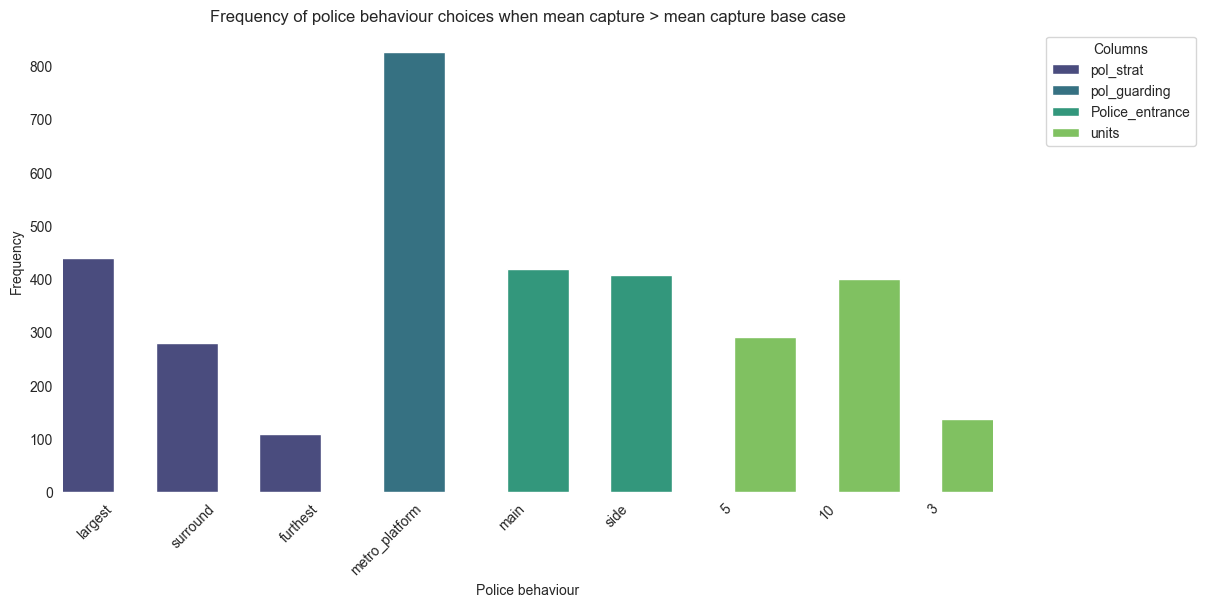

In [54]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] > threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['pol_strat',
       'pol_guarding', 'Police_entrance', 'units'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Police behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of police behaviour choices when mean capture > mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

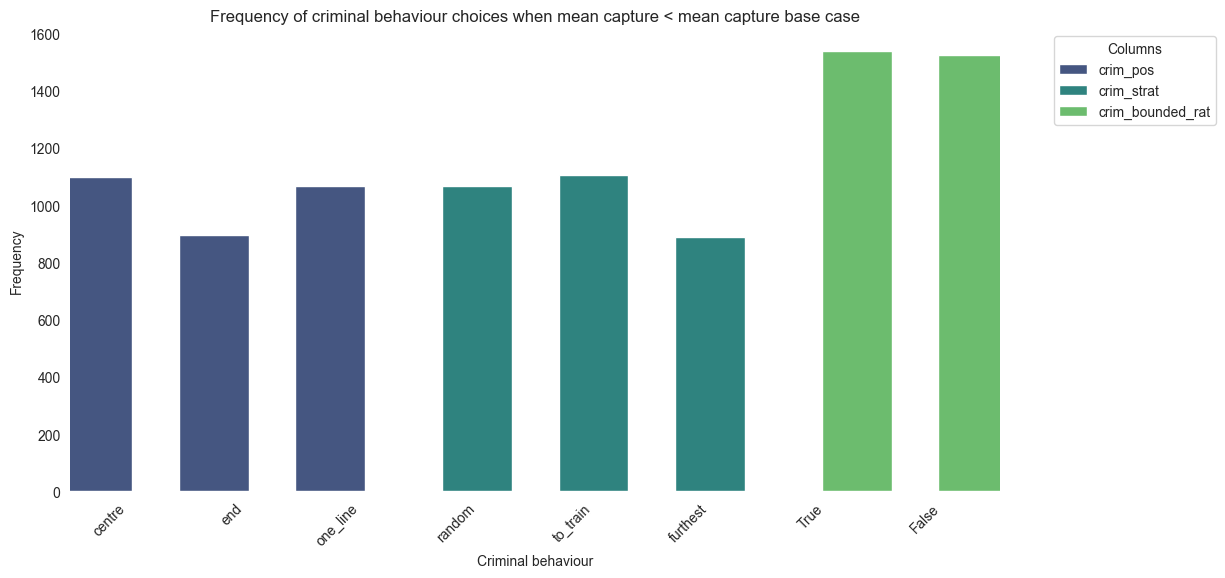

In [56]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] < threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['crim_pos', 'crim_strat', 'crim_bounded_rat'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Criminal behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of criminal behaviour choices when mean capture < mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

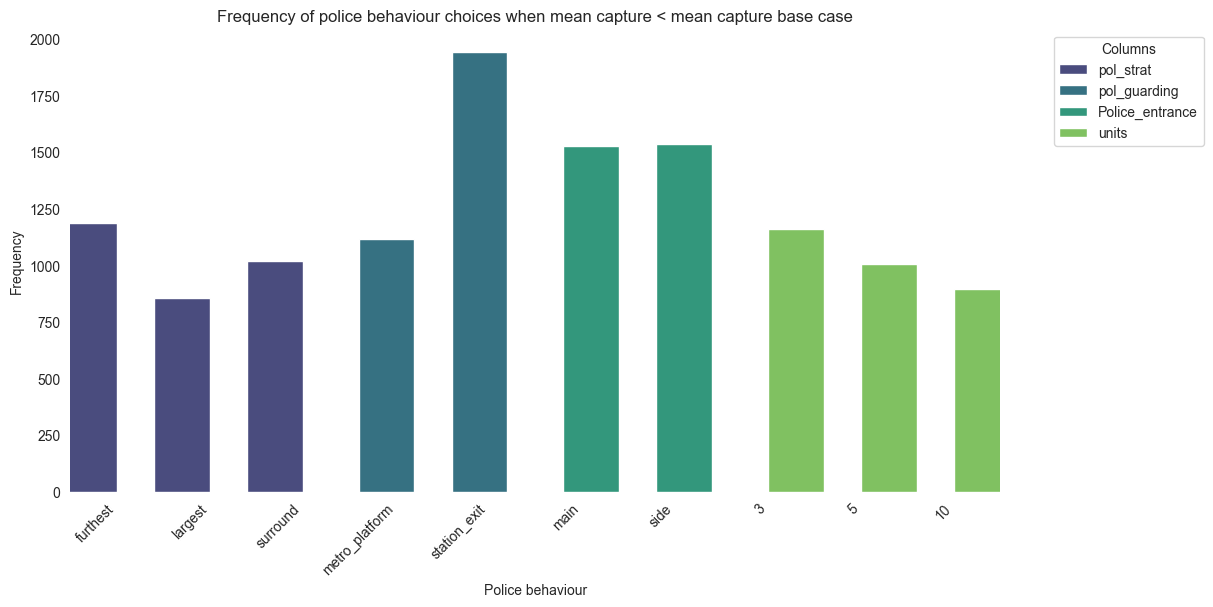

In [57]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] < threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['pol_strat',
       'pol_guarding', 'Police_entrance', 'units'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Police behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of police behaviour choices when mean capture < mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

In [58]:
group_mean_capture_sorted = group_mean_capture.sort_values(by='mean_capture', ascending=False)

In [59]:
best_scen=group_mean_capture_sorted['scenario'].iloc[0]
best_scen

3506

In [60]:
best=combined_inout[combined_inout['scenario']==best_scen]

# Uncertainties

In [62]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_bound_rat_time', 'crim_loose_goal', 'crim_max_diverge',
       'pol_strat', 'pol_guarding', 'Police_entrance', 'units',
       'P_multiple_at_station', 'police_start_pos103', 'police_start_pos104',
       'police_goal103', 'police_goal104', 'police_changed_goal103',
       'police_changed_goal10

In [8]:
listy=['crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay','criminal_detection_police']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture','time']]

    # Calculate mean, std, and var for 'capture' within each group
    result_df = grouped_df.agg(['mean', 'std']).reset_index()

    # Rename the columns for clarity
    result_df.columns = [item, 'mean_capture', 'std_capture','mean_time', 'std_time']
    result_df=result_df.round(2)
    display(result_df)

crim_Sguard_percent  mean_capture  std_capture  mean_time  std_time
0                   50          0.21         0.41      32.94     22.02
1                   70          0.22         0.42      32.96     22.03
2                   90          0.24         0.43      32.90     21.96

crim_Mguard_percent  mean_capture  std_capture  mean_time  std_time
0                   50          0.19         0.40      33.57     21.97
1                   70          0.23         0.42      32.90     22.01
2                   90          0.25         0.43      32.34     22.02

init_call_delay  mean_capture  std_capture  mean_time  std_time
0                1          0.27         0.45      30.05     22.84
1                3          0.23         0.42      32.90     21.87
2                6          0.17         0.37      35.86     20.87

criminal_detection_police  mean_capture  std_capture  mean_time  std_time
0                         50          0.23         0.42      32.96     22.04
1                         70          0.22         0.42      32.94     21.98
2                         90          0.22         0.41      32.90     21.99

In [9]:
for item in listy:
    print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
    print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

crim_Sguard_percent capture 0.21
crim_Sguard_percent time -0.23 

crim_Mguard_percent capture 0.38
crim_Mguard_percent time -8.19 

init_call_delay capture -0.09
init_call_delay time 4.85 

criminal_detection_police capture -0.04
criminal_detection_police time -0.41 



In [65]:
columns_of_interest =['crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay','criminal_detection_police']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_Sguard_percent crim_Mguard_percent init_call_delay  \
                                                             
9                   50                  70               1   
37                  70                  70               1   
20                  50                  90               1   
65                  90                  70               1   
38                  70                  70               1   
..                 ...                 ...             ...   
60                  90                  50               6   
26                  50                  90               6   
52                  70                  90               6   
8                   50                  50               6   
71                  90                  70               6   

   criminal_detection_police   capture                           time  \
                                  mean       std       var       mean   
9                         50  0.249379  0.432682  0.187214  30.218991   
37                        70  0.278673  0.448376  0.201041  30.225587   
20                        90  0.266509  0.442163  0.195508  29.644217   
65                        90  0.300223  0.458385  0.210117  30.020470   
38                        90  0.272584  0.445318  0.198308  30.103692   
..                       ...       ...       ...       ...        ...   
60                        50  0.143551  0.350657  0.122960  36.144666   
26                        90  0.192358  0.394179  0.155377  35.184349   
52                        70  0.199921  0.399967  0.159974  35.150302   
8                         90  0.130732  0.337129  0.113656  36.400801   
71                        90  0.168790  0.374591  0.140319  35.712334   

                           
          std         var  
9   23.272277  541.598867  
37  23.174876  537.074891  
20  23.171746  536.929796  
65  23.091164  533.201878  
38  23.066405  532.059038  
..        ...         ...  
60  20.625177  425.397934  
26  20.622565  425.290174  
52  20.603350  424.498024  
8   20.589081  423.910263  
71  20.376167  415.188191  

[81 rows x 10 columns]

In [66]:
test=combined_inout['crim_Sguard_percent'].unique().tolist()
test

[50, 70, 90]

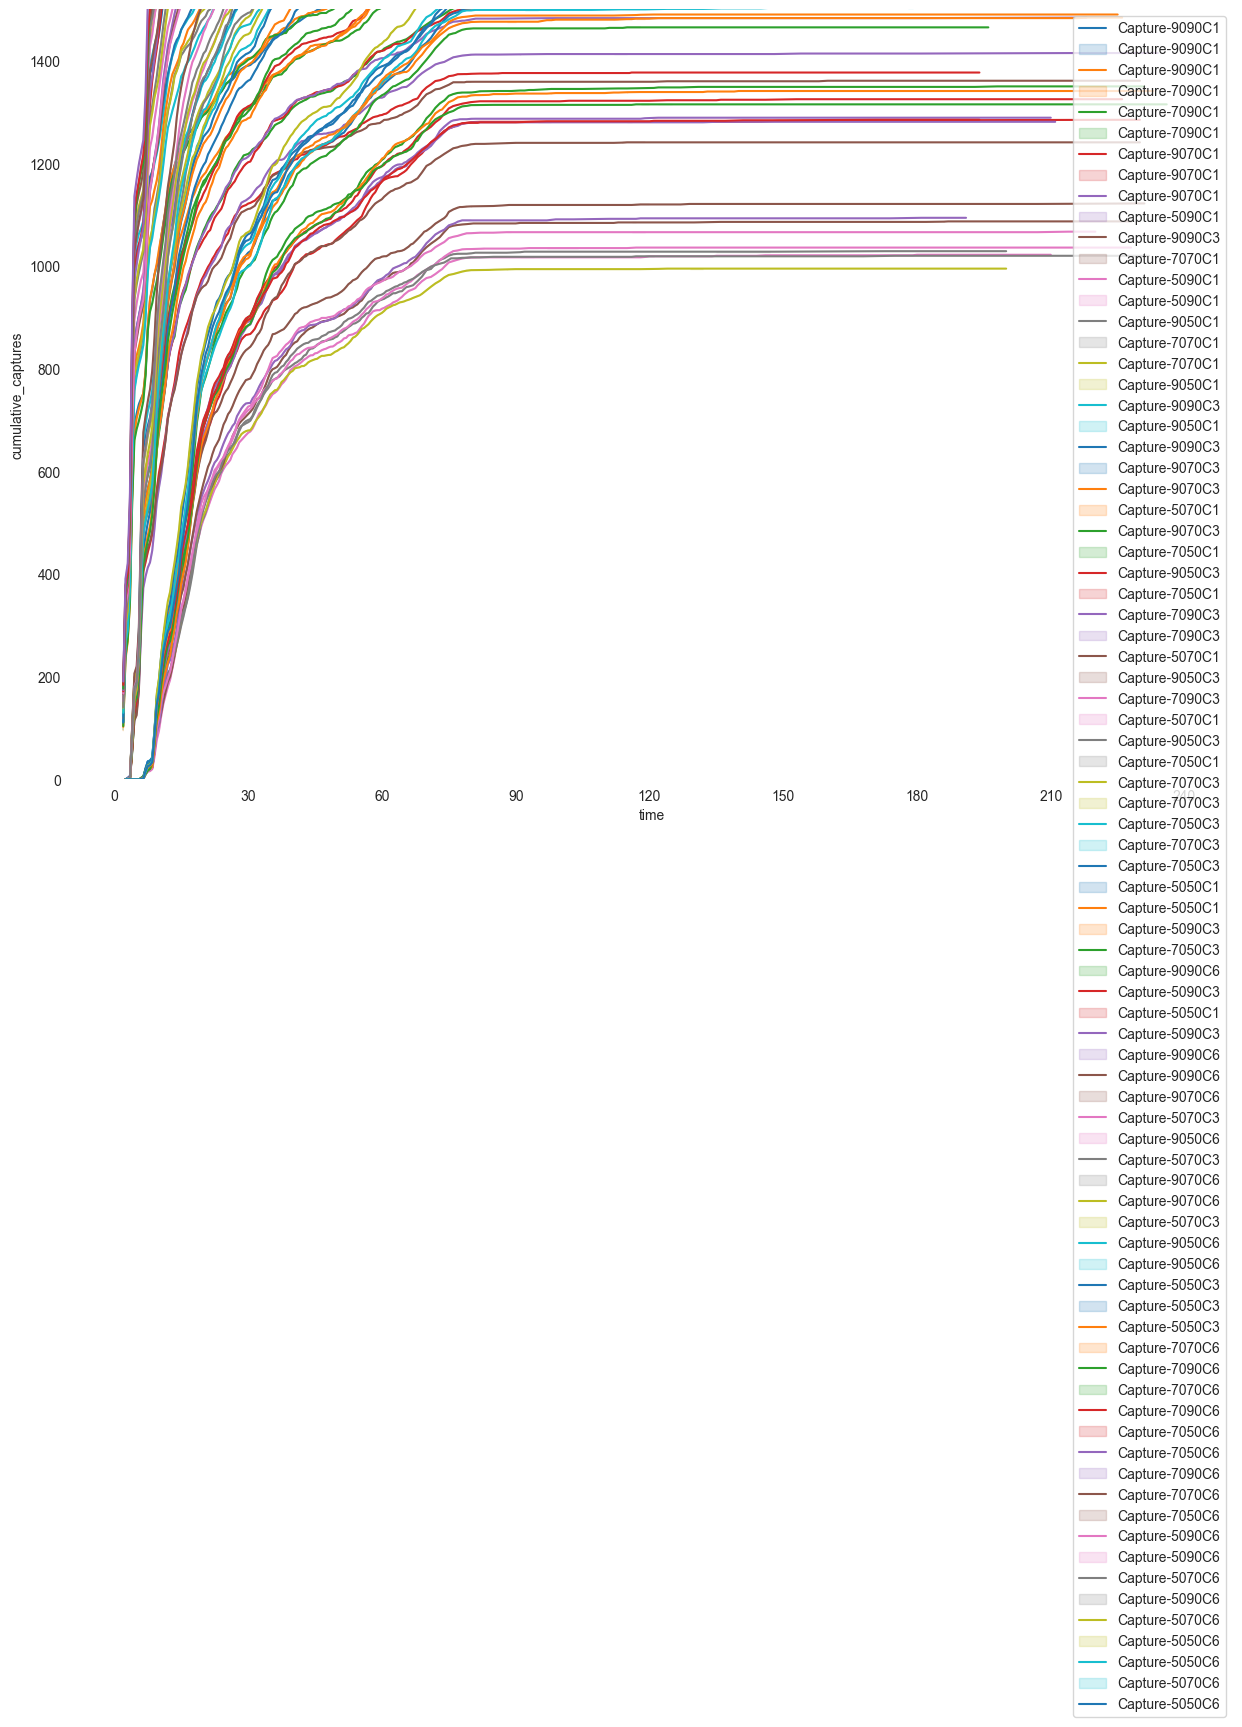

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

Sguard = combined_inout['crim_Sguard_percent'].unique().tolist()
Mguard = combined_inout['crim_Mguard_percent'].unique().tolist()
call = combined_inout['init_call_delay'].unique().tolist()
pol_det=combined_inout['criminal_detection_police'].unique().tolist()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

legend_entries = []  # To store legend entries and corresponding maximum cumulative captures

for i, category in enumerate(Sguard):
    for j, guard in enumerate(Mguard):
        for c in call:
            for p in pol_det: 
                # Filter the DataFrame based on the current category and guard
                df = combined_inout[
                    (combined_inout[f'crim_Mguard_percent'] == int(category)) &
                    (combined_inout[f'crim_Sguard_percent'] == int(guard)) &
                    (combined_inout['init_call_delay'] == c)&
                    (combined_inout['criminal_detection_police'] == p)
                ]

                # Sort the DataFrame by 'time'
                df = df.sort_values(by='time')

                # Create a new column 'cumulative_captures' representing the cumulative sum of captures
                df['cumulative_captures'] = df['capture'].cumsum()

                # Store the legend entry and the maximum cumulative captures
                legend_entries.append((f'Capture-{category}{guard}C{c}', df['cumulative_captures'].max()))

                # Plot the line graph
                sns.lineplot(x='time', y='cumulative_captures', data=df, label=f'Capture-{category}{guard}C{c}', palette='viridis')
                # ax.axvline(x=70, color='grey', linestyle='--',)

# Sort the legend entries based on maximum cumulative captures
legend_entries.sort(key=lambda x: x[1], reverse=True)

# Set custom x-axis ticks
plt.xticks(range(0, 250, 30))

# Set the y-axis limit
plt.ylim(0, 1500)

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Show legend
ax.legend([entry[0] for entry in legend_entries], loc='upper right')

plt.show()

AttributeError: 'Figure' object has no attribute 'set_aspect'

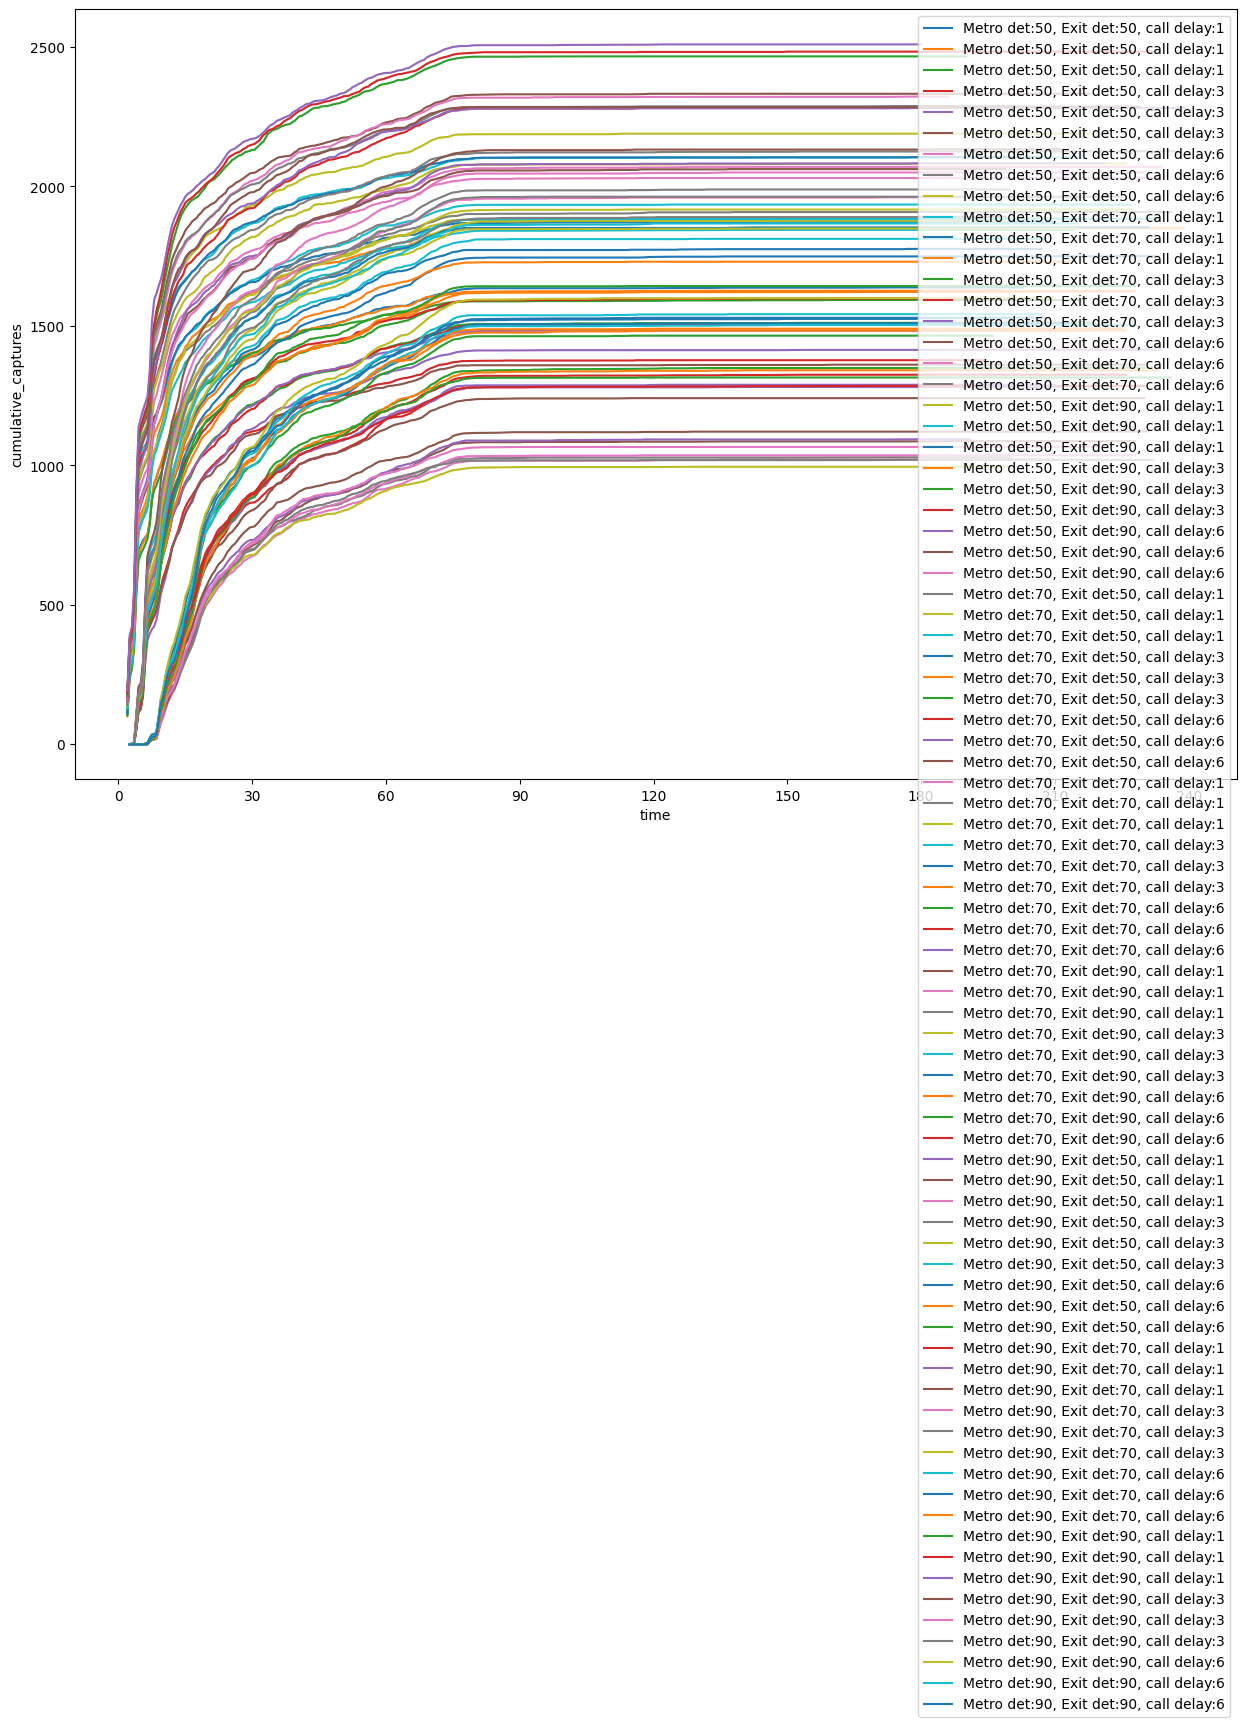

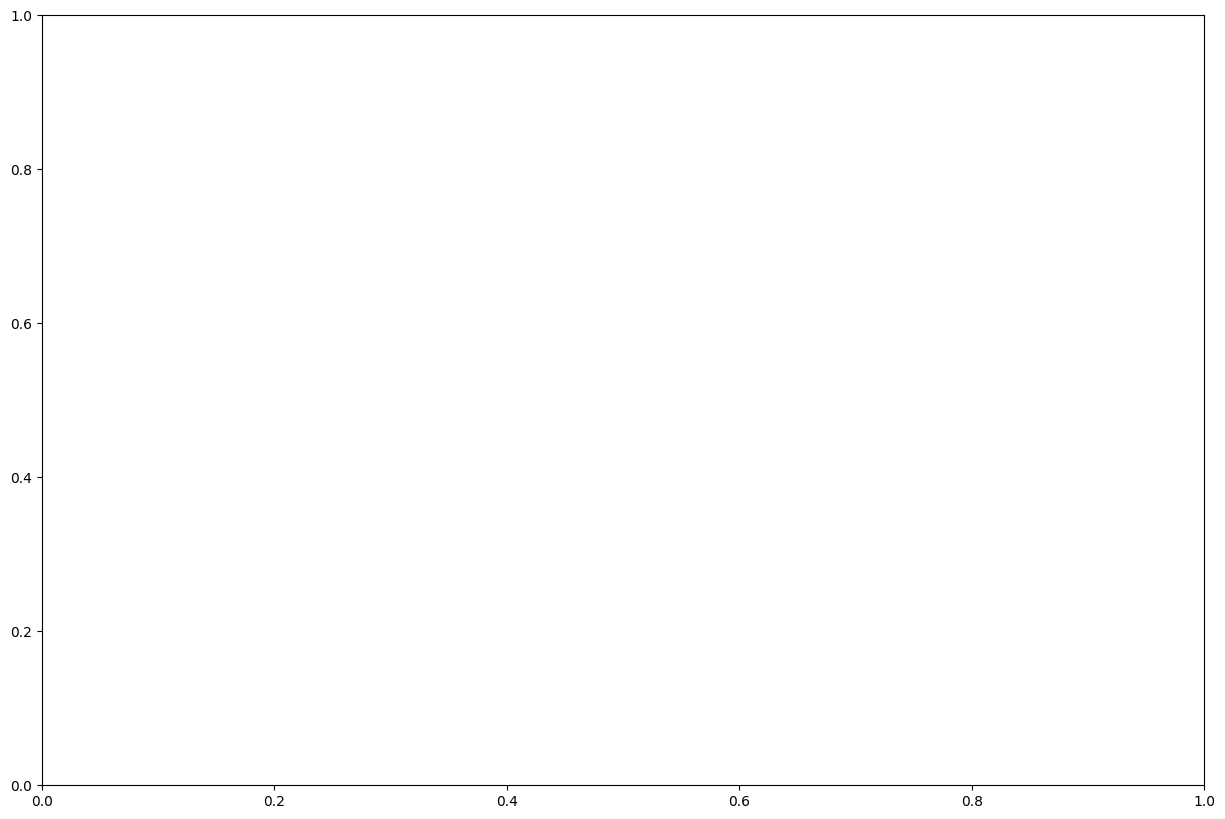

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Sguard = ['50', '70', '90']
Mguard = ['50', '70', '90']
call = [1, 3, 6]
crim_det = ['50', '70', '90']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

max_cumulative_captures = float('-inf')
min_cumulative_captures = float('inf')

for i, category in enumerate(Sguard):
    for j, guard in enumerate(Mguard):
        for c in call:
            for cd in crim_det:
                # Filter the DataFrame based on the current category and guard
                df = combined_inout[
                    (combined_inout[f'crim_Mguard_percent'] == int(category.strip('M'))) &
                    (combined_inout[f'crim_Sguard_percent'] == int(guard.strip('S'))) &
                    (combined_inout['init_call_delay'] == c) &
                    (combined_inout[f'criminal_detection_police'] == int(cd)) 

                ]

                # Sort the DataFrame by 'time'
                df = df.sort_values(by='time')

                # Create a new column 'cumulative_captures' representing the cumulative sum of captures
                df['cumulative_captures'] = df['capture'].cumsum()

                # Find the maximum and minimum cumulative captures
                max_capture = df['cumulative_captures'].max()
                min_capture = df['cumulative_captures'].min()

                # Update max and min cumulative captures if necessary
                if max_capture > max_cumulative_captures:
                    max_cumulative_captures = max_capture
                if min_capture < min_cumulative_captures:
                    min_cumulative_captures = min_capture

                # Plot the line graph
                sns.lineplot(x='time', y='cumulative_captures', data=df,
                             label=f'Metro det:{category}, Exit det:{guard}, call delay:{c}', palette='viridis')
            

# Set custom x-axis ticks
plt.xticks(range(0, 250, 30))

# Set the y-axis limit
# plt.ylim(0, 5000)
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_aspect('auto')

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Set the color of lines with max and min cumulative captures
for line in ax.lines:
    max_line = max(line.get_ydata()) == max_cumulative_captures
    min_line = min(line.get_ydata()) == min_cumulative_captures

    if max_line:
        line.set_color('gold')
    elif min_line:
        line.set_color('darkslateblue')
    else:
        line.set_color('lightgray')  # For other lines


# Adjust layout to accommodate the legend
plt.tight_layout()

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Show legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Save the figure with a tight bounding box
plt.savefig('Figures/crimint_uncertainties1.png', bbox_inches='tight')

plt.show()